In [1]:
#pip install missingno
#! pip install pydotplus
#! pip install graphviz

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics  
from sklearn.model_selection import KFold
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, roc_curve, roc_auc_score


In [2]:
# for inline plots in jupyter
%matplotlib inline 

In [3]:
sns.set(color_codes=True) # settings for seaborn plotting style
sns.set(rc={'figure.figsize':(5,5)}) # settings for seaborn plot sizes

In [5]:
df = pd.read_csv("hotels_train.csv") #loads the data into df 

In [6]:
################# KNOWING THE DATA #############################

In [6]:
print("Shape: ", df.shape) #print size of rows and calls
df.head() #top 5 rows

Shape:  (27213, 18)


,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled
0,INN09588,1,5,Room_Type 1,half board,2,0,0,0,2,34.0,Online,0,0,0,108.4,11/28/2018,0
1,INN07691,0,3,Room_Type 1,NaN,2,0,0,0,0,365.0,NaN,0,0,0,NaN,11/03/2018,1
2,INN32192,0,2,Room_Type 4,half board,1,0,0,0,1,148.0,Online,0,0,0,137.3,05/06/2018,0
3,INN32218,1,2,Room_Type 1,NaN,2,0,0,0,0,502.0,Offline,0,0,0,127.0,9/26/2018,1
4,INN02994,1,3,Room_Type 4,half board,2,0,1,0,2,32.0,Offline,0,0,0,110.0,10/19/2017,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   27213 non-null  object 
 1   weekend_nights       27213 non-null  int64  
 2   week_nights          27213 non-null  int64  
 3   room_type            27213 non-null  object 
 4   board_type           19045 non-null  object 
 5   n_adults             27213 non-null  int64  
 6   n_less_12            27213 non-null  int64  
 7   n_more_12            27213 non-null  int64  
 8   booked_tour          27213 non-null  int64  
 9   n_requests           27213 non-null  int64  
 10  lead_time            26794 non-null  float64
 11  purchase_type        22366 non-null  object 
 12  n_p_cacellation      27213 non-null  int64  
 13  n_p_not_cacellation  27213 non-null  int64  
 14  repeated             27213 non-null  int64  
 15  price                23808 non-null 

In [9]:
# we can see that 'board_type' , 'lead_time' , 'purchase_type' , 'price' have missing values. 

In [10]:
df.describe(include='all')

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled
count,27213,27213.000000,27213.000000,27213,19045,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,26794.000000,22366,27213.000000,27213.000000,27213.000000,23808.000000,27213,27213.000000
unique,27213,NaN,NaN,7,4,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,553,NaN
top,INN09588,NaN,NaN,Room_Type 1,half board,NaN,NaN,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,10/13/2018,NaN
freq,1,NaN,NaN,21084,14591,NaN,NaN,NaN,NaN,NaN,NaN,14306,NaN,NaN,NaN,NaN,188,NaN
mean,NaN,0.812810,2.197332,NaN,NaN,1.845221,0.052989,0.053357,0.031750,0.621100,102.952377,NaN,0.021975,0.155404,0.026421,123.455494,NaN,0.327674
std,NaN,0.869317,1.403576,NaN,NaN,0.519715,0.266150,0.268688,0.175336,0.785642,103.498942,NaN,0.346697,1.728693,0.160387,35.136566,NaN,0.469374
min,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,20.000000,NaN,0.000000
25%,NaN,0.000000,1.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,21.000000,NaN,0.000000,0.000000,0.000000,100.300000,NaN,0.000000
50%,NaN,1.000000,2.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,69.000000,NaN,0.000000,0.000000,0.000000,119.450000,NaN,0.000000
75%,NaN,2.000000,3.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,1.000000,153.000000,NaN,0.000000,0.000000,0.000000,140.000000,NaN,1.000000


In [11]:
target =pd.DataFrame(df['is_canceled']) 
data = df.drop(['ID', 'is_canceled'], axis=1)
data

,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date
0,1,5,Room_Type 1,half board,2,0,0,0,2,34.0,Online,0,0,0,108.4,11/28/2018
1,0,3,Room_Type 1,NaN,2,0,0,0,0,365.0,NaN,0,0,0,NaN,11/03/2018
2,0,2,Room_Type 4,half board,1,0,0,0,1,148.0,Online,0,0,0,137.3,05/06/2018
3,1,2,Room_Type 1,NaN,2,0,0,0,0,502.0,Offline,0,0,0,127.0,9/26/2018
4,1,3,Room_Type 4,half board,2,0,1,0,2,32.0,Offline,0,0,0,110.0,10/19/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27208,1,2,Room_Type 1,NaN,3,0,0,0,1,106.0,NaN,0,0,0,NaN,7/18/2018
27209,0,4,Room_Type 1,half board,2,0,0,0,1,18.0,Online,0,0,0,113.0,2/24/2018
27210,0,2,Room_Type 1,NaN,2,0,0,0,0,147.0,Offline,0,0,0,105.0,4/15/2018
27211,1,0,Room_Type 4,half board,1,0,0,0,0,3.0,Aviation,0,0,0,130.0,5/22/2018


In [12]:
numeric_col = data.describe().columns # get the numeric column (numbers)
numeric_col

Index(['weekend_nights', 'week_nights', 'n_adults', 'n_less_12', 'n_more_12',
       'booked_tour', 'n_requests', 'lead_time', 'n_p_cacellation',
       'n_p_not_cacellation', 'repeated', 'price'],
      dtype='object')

In [13]:
numeric_data = data[numeric_col]
for col in ['weekend_nights', 'week_nights', 'n_adults', 'n_less_12', 'n_more_12', 'n_requests', 'lead_time', 'price']:
    print(col, ' skewness:', numeric_data[col].skew(axis = 0, skipna = True) )

weekend_nights  skewness: 0.7187888765659908
week_nights  skewness: 1.5422954469230514
n_adults  skewness: -0.32416096529704014
n_less_12  skewness: 5.749665488234375
n_more_12  skewness: 5.569096359968911
n_requests  skewness: 1.1437446108569245
lead_time  skewness: 1.291447308852505
price  skewness: 0.682392611272259


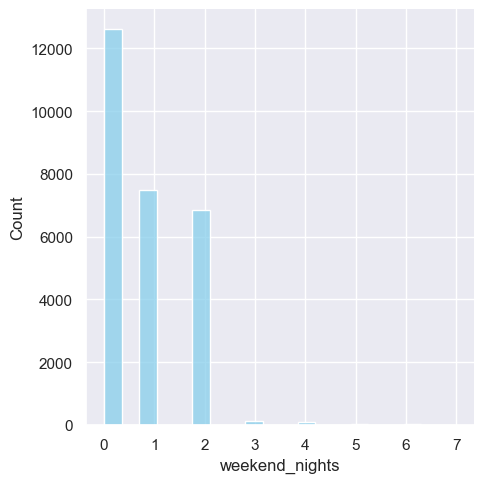

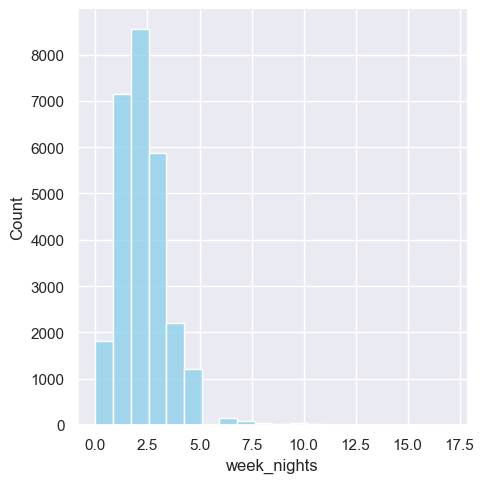

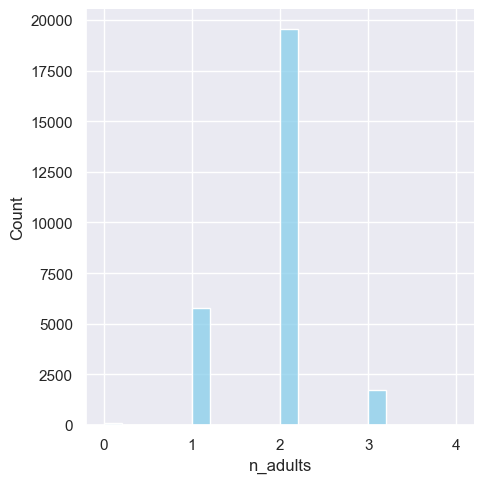

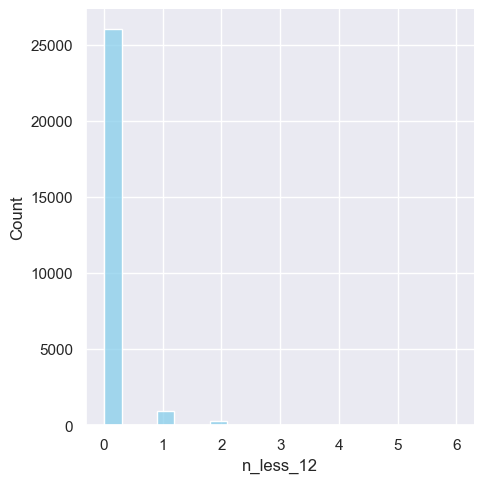

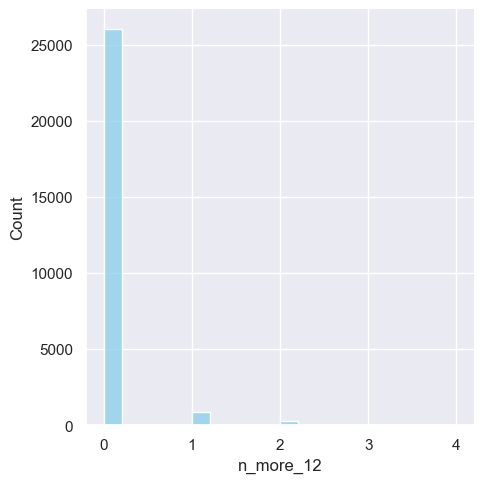

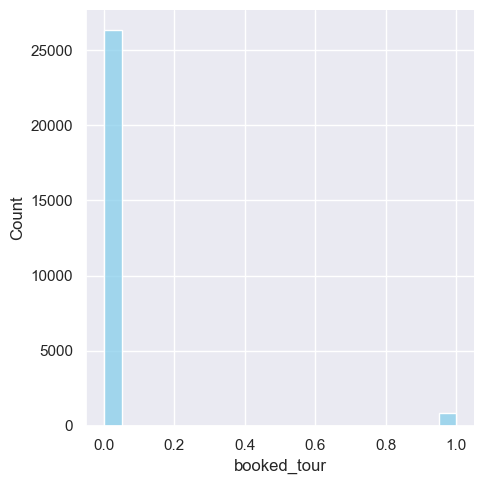

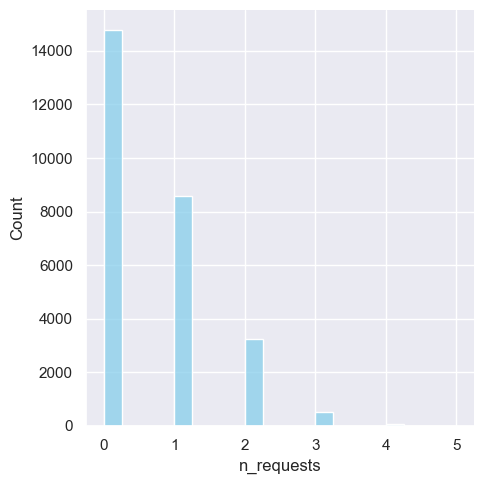

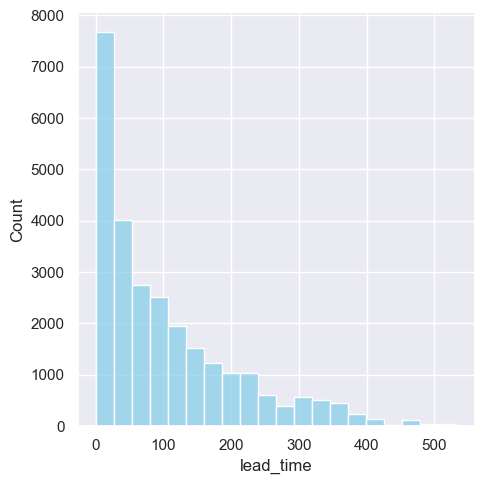

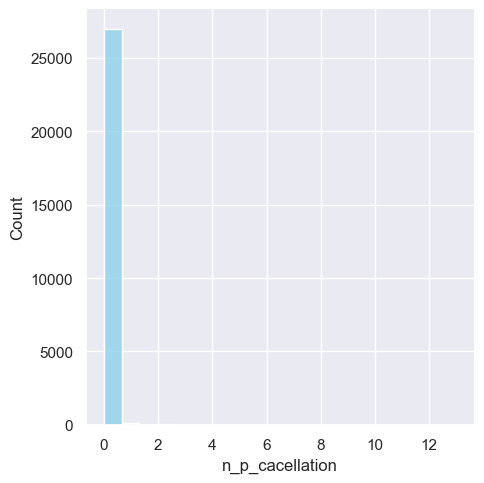

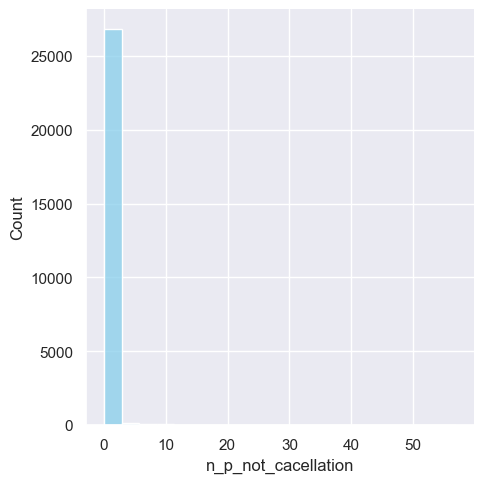

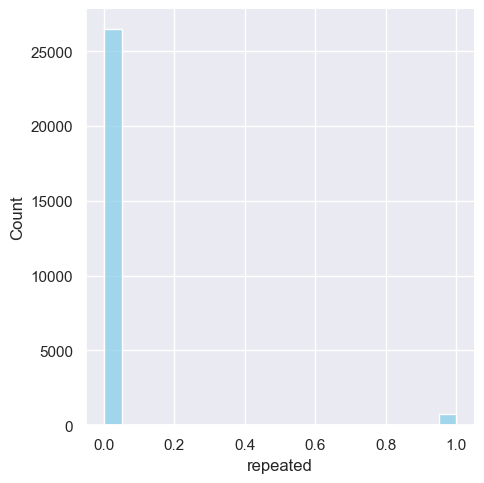

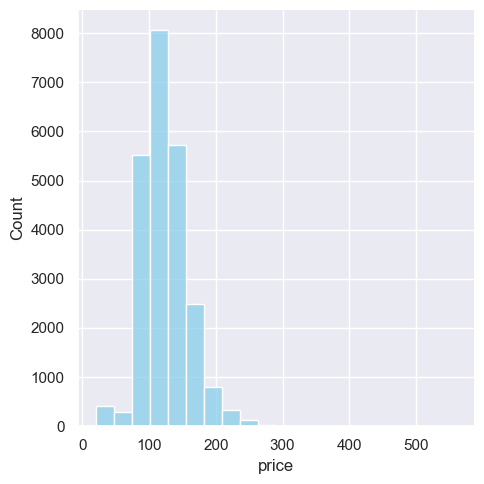

In [14]:
#numeric_data = numeric_data.replace([np.inf, -np.inf], np.nan)
warnings.filterwarnings('ignore', category=FutureWarning, message='use_inf_as_na option is deprecated')
for col in numeric_col:
    sns.displot(numeric_data[col], bins=20, color='skyblue')

In [15]:
nominal_data = data.drop(numeric_col, axis=1)
nominal_data

,room_type,board_type,purchase_type,date
0,Room_Type 1,half board,Online,11/28/2018
1,Room_Type 1,NaN,NaN,11/03/2018
2,Room_Type 4,half board,Online,05/06/2018
3,Room_Type 1,NaN,Offline,9/26/2018
4,Room_Type 4,half board,Offline,10/19/2017
...,...,...,...,...
27208,Room_Type 1,NaN,NaN,7/18/2018
27209,Room_Type 1,half board,Online,2/24/2018
27210,Room_Type 1,NaN,Offline,4/15/2018
27211,Room_Type 4,half board,Aviation,5/22/2018


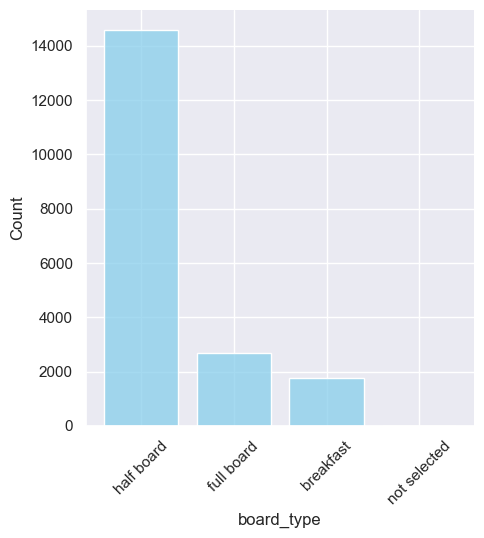

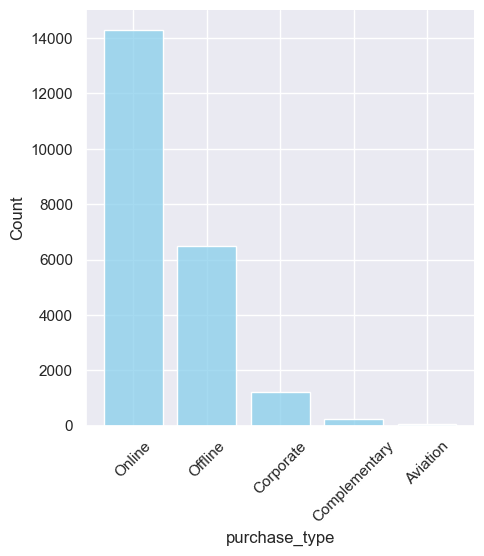

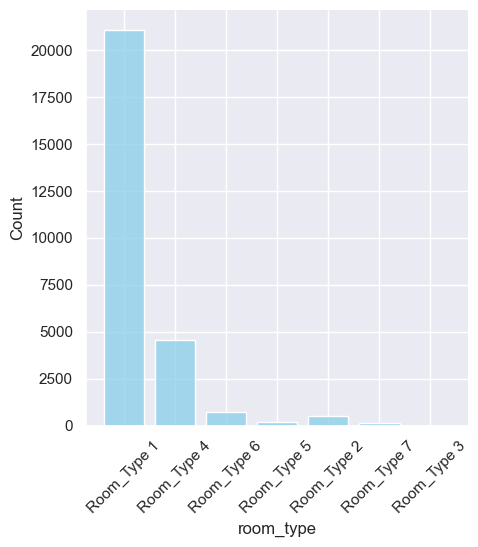

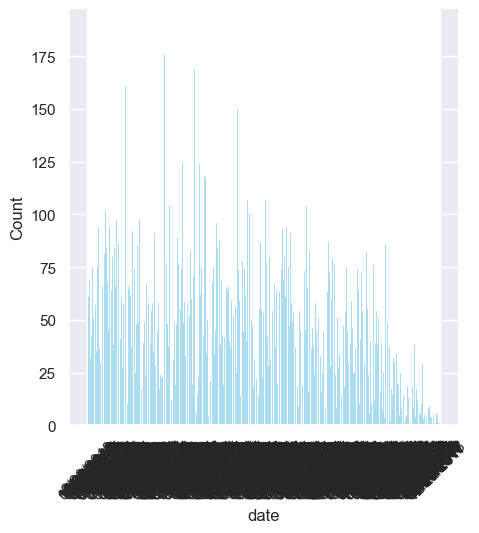

In [16]:
cat_col = ['board_type','purchase_type','room_type','date']
for col in cat_col:
    sns.displot(nominal_data, x=col, shrink=.8, color='skyblue')
    plt.xticks(rotation=45)  # Optionally rotate the x-axis labels for better readability

In [17]:
nominal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   room_type      27213 non-null  object
 1   board_type     19045 non-null  object
 2   purchase_type  22366 non-null  object
 3   date           27213 non-null  object
dtypes: object(4)
memory usage: 850.5+ KB


In [18]:
describe_df = nominal_data.describe()
describe_df

,room_type,board_type,purchase_type,date
count,27213,19045,22366,27213
unique,7,4,5,553
top,Room_Type 1,half board,Online,10/13/2018
freq,21084,14591,14306,188


In [19]:
describe_df.loc['%freq'] = describe_df.apply(lambda x: np.round(x.loc['freq']/891, decimals=3))
describe_df

,room_type,board_type,purchase_type,date
count,27213,19045,22366,27213
unique,7,4,5,553
top,Room_Type 1,half board,Online,10/13/2018
freq,21084,14591,14306,188
%freq,23.663,16.376,16.056,0.211


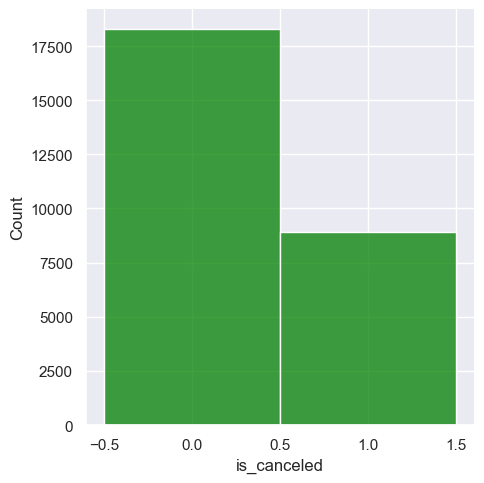

In [20]:
sns.displot(target, x='is_canceled', color='green', discrete=True)

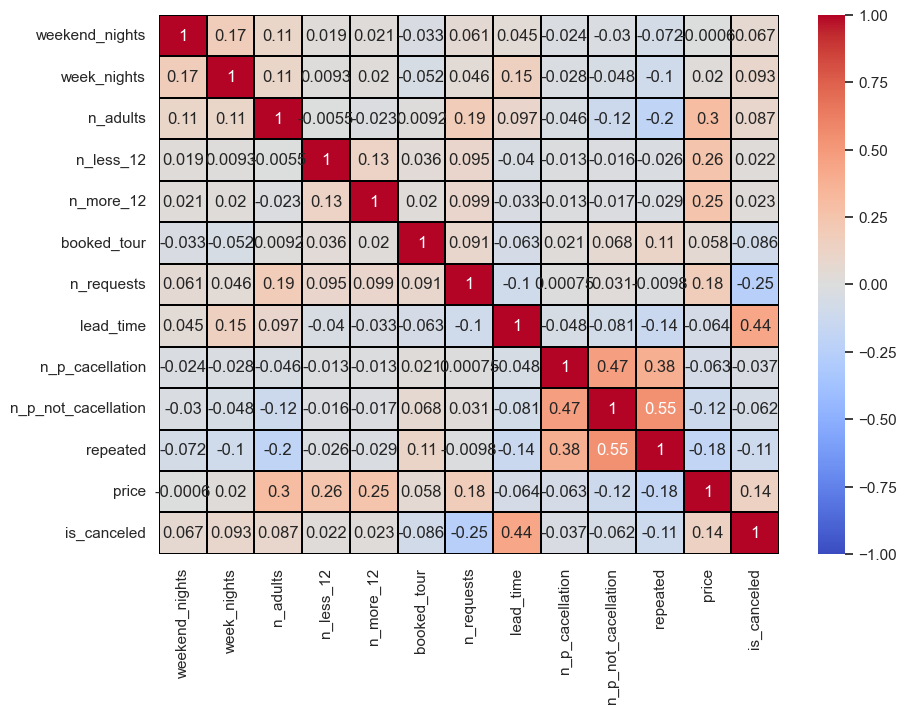

In [7]:
f, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(df[df.describe().columns].corr(), annot = True, vmin=-1, vmax=1, center= 0,
            cmap= 'coolwarm', linewidths=0.2, linecolor='black')

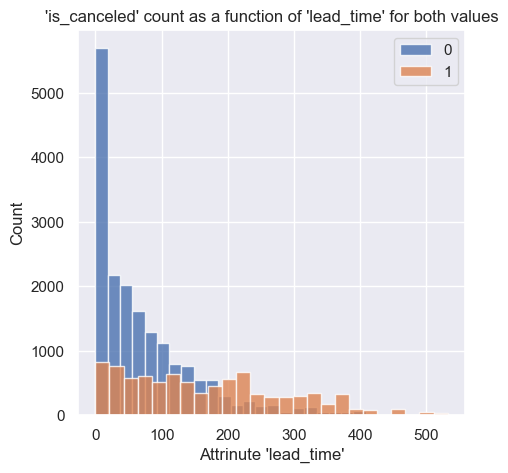

In [10]:
df.groupby('is_canceled')['lead_time'].plot(kind='hist', bins=25, alpha=0.8, legend=True)
plt.xlabel('Attrinute \'lead_time\'')
plt.ylabel('Count')
plt.title('\'is_canceled\' count as a function of \'lead_time\' for both values')
plt.show()

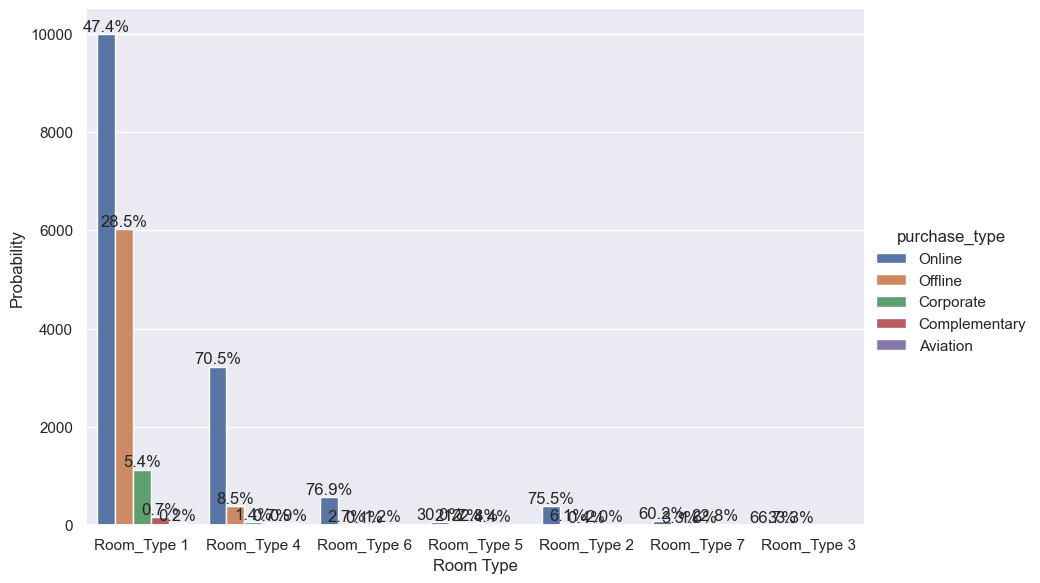

In [11]:
g = sns.catplot(data=df, x='room_type', hue='purchase_type', kind='count', height=6, aspect=1.5)
g.set_axis_labels('Room Type', 'Probability')
g.set_titles('Normalized Purchase Methods by Room Type')
total_counts = df['room_type'].value_counts()
for ax in g.axes.flat:
    for c in ax.containers:
        labels = [f'{(v.get_height() / total_counts[i.get_text()]) * 100:.1f}%' for i, v in zip(ax.get_xticklabels(), c)]
        ax.bar_label(c, labels=labels, label_type='edge')
plt.show()

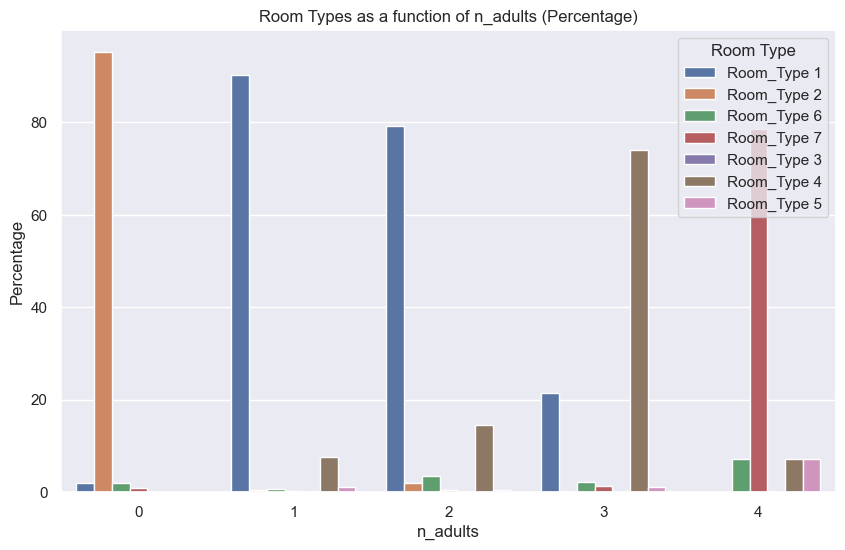

In [17]:
count_df = df.groupby(['n_adults', 'room_type']).size().reset_index(name='count')

# Calculate the percentage for each room type within each number of adults
count_df['percentage'] = count_df.groupby('n_adults')['count'].transform(lambda x: 100 * x / x.sum())

# Bar plot showing the percentages

plt.figure(figsize=(10, 6))
sns.barplot(data=count_df, x='n_adults', y='percentage', hue='room_type')
plt.title('Room Types as a function of n_adults (Percentage)')
plt.xlabel('n_adults')
plt.ylabel('Percentage')
plt.legend(title='Room Type')
plt.show()


In [24]:
#################### HANDLEING NALL VALUES #########################

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   27213 non-null  object 
 1   weekend_nights       27213 non-null  int64  
 2   week_nights          27213 non-null  int64  
 3   room_type            27213 non-null  object 
 4   board_type           19045 non-null  object 
 5   n_adults             27213 non-null  int64  
 6   n_less_12            27213 non-null  int64  
 7   n_more_12            27213 non-null  int64  
 8   booked_tour          27213 non-null  int64  
 9   n_requests           27213 non-null  int64  
 10  lead_time            26794 non-null  float64
 11  purchase_type        22366 non-null  object 
 12  n_p_cacellation      27213 non-null  int64  
 13  n_p_not_cacellation  27213 non-null  int64  
 14  repeated             27213 non-null  int64  
 15  price                23808 non-null 

In [26]:
missing_values = ['board_type','lead_time','purchase_type','price']

In [27]:
df[df.isnull().sum(axis=1)>0]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled
1,INN07691,0,3,Room_Type 1,NaN,2,0,0,0,0,365.0,NaN,0,0,0,NaN,11/03/2018,1
3,INN32218,1,2,Room_Type 1,NaN,2,0,0,0,0,502.0,Offline,0,0,0,127.00,9/26/2018,1
7,INN15297,2,3,Room_Type 1,NaN,2,0,0,0,1,92.0,NaN,0,0,0,78.90,3/27/2018,0
15,INN21259,2,2,Room_Type 6,NaN,2,1,0,0,0,27.0,Offline,0,0,0,154.78,12/26/2017,0
19,INN23090,2,3,Room_Type 1,NaN,2,0,0,0,0,75.0,Offline,0,0,0,88.00,12/25/2018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27199,INN14894,2,1,Room_Type 4,NaN,2,0,0,0,0,48.0,NaN,0,0,0,NaN,10/31/2017,0
27202,INN35464,2,2,Room_Type 1,NaN,2,0,0,0,0,113.0,NaN,0,0,0,NaN,03/12/2018,0
27205,INN06815,0,2,Room_Type 1,NaN,2,0,0,0,1,384.0,NaN,0,0,0,135.00,8/18/2018,1
27208,INN09056,1,2,Room_Type 1,NaN,3,0,0,0,1,106.0,NaN,0,0,0,NaN,7/18/2018,0


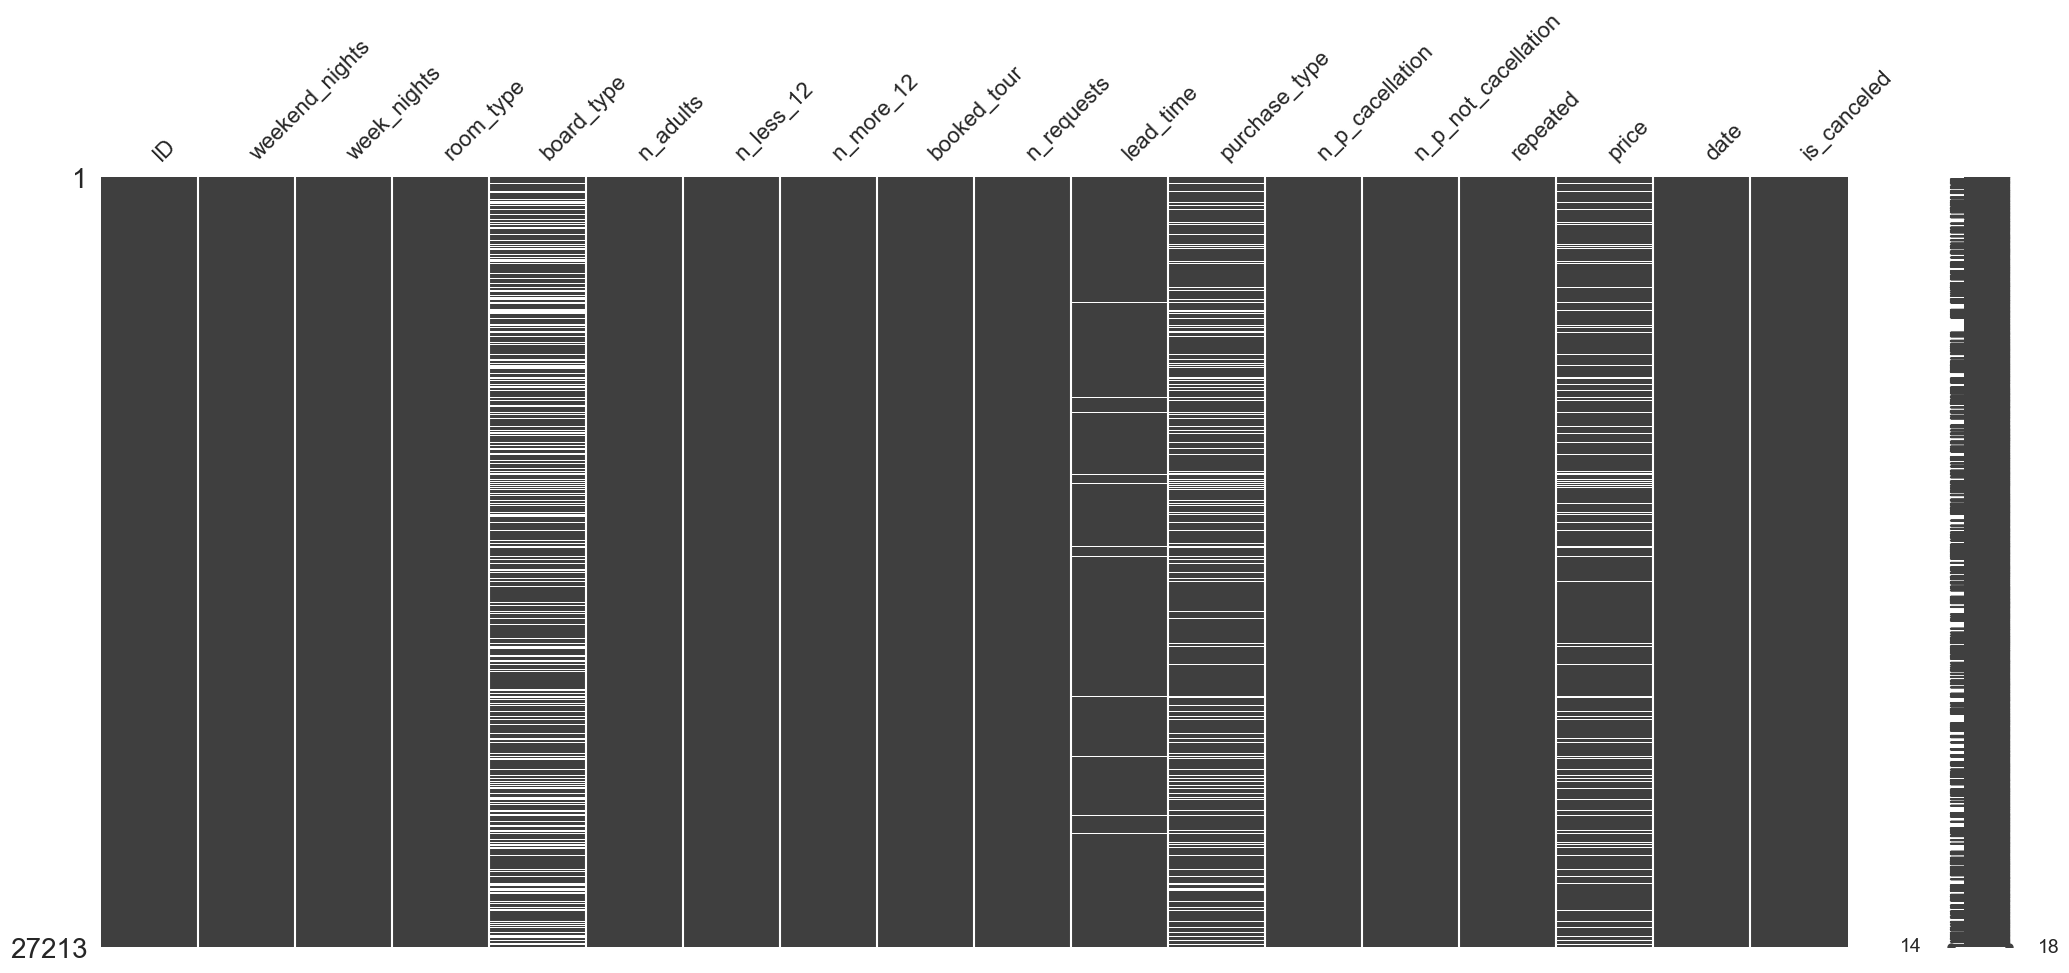

In [28]:
msno.matrix(df)
plt.show()

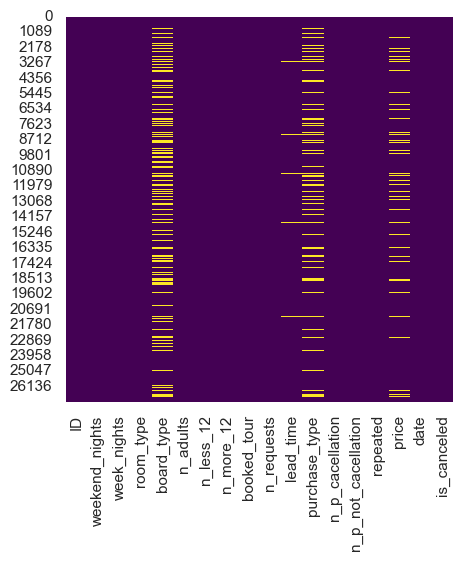

In [29]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [30]:
######### Handle board_type ###########

In [31]:
df[df['board_type'].isnull()]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled
1,INN07691,0,3,Room_Type 1,NaN,2,0,0,0,0,365.0,NaN,0,0,0,NaN,11/03/2018,1
3,INN32218,1,2,Room_Type 1,NaN,2,0,0,0,0,502.0,Offline,0,0,0,127.00,9/26/2018,1
7,INN15297,2,3,Room_Type 1,NaN,2,0,0,0,1,92.0,NaN,0,0,0,78.90,3/27/2018,0
15,INN21259,2,2,Room_Type 6,NaN,2,1,0,0,0,27.0,Offline,0,0,0,154.78,12/26/2017,0
19,INN23090,2,3,Room_Type 1,NaN,2,0,0,0,0,75.0,Offline,0,0,0,88.00,12/25/2018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27199,INN14894,2,1,Room_Type 4,NaN,2,0,0,0,0,48.0,NaN,0,0,0,NaN,10/31/2017,0
27202,INN35464,2,2,Room_Type 1,NaN,2,0,0,0,0,113.0,NaN,0,0,0,NaN,03/12/2018,0
27205,INN06815,0,2,Room_Type 1,NaN,2,0,0,0,1,384.0,NaN,0,0,0,135.00,8/18/2018,1
27208,INN09056,1,2,Room_Type 1,NaN,3,0,0,0,1,106.0,NaN,0,0,0,NaN,7/18/2018,0


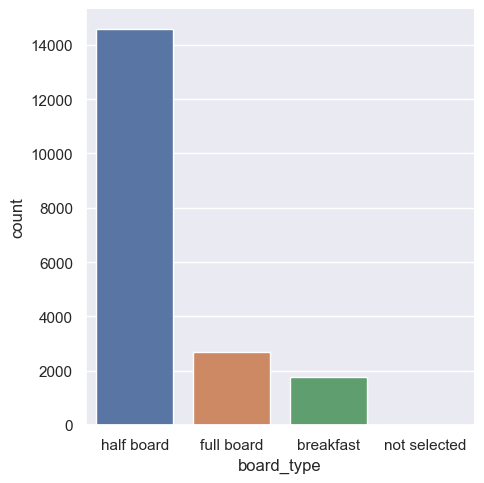

In [32]:
sns.catplot(x = 'board_type', kind = 'count', data = df)

In [33]:
# קל לראות שחצי פנסיון זה האפשרות הנפוצה ביותר 
# בנוסף בשלב זה אני מאמין כי ערך זה לא משפיע משמעותית על ביטול הזמנה
# לכן אני משער כרגע שניתן לתת לכל הערכים החסרים גם כן חצי פנסיון

In [34]:
df['board_type'].value_counts()['half board']/df.shape[0] 

0.5361775621945394

In [35]:
mode = df['board_type'].mode()[0]
mode

'half board'

In [36]:
df['board_type'] = df['board_type'].fillna(mode)

In [37]:
df[df['board_type'].isnull()]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled


In [38]:
df[df['board_type'] == 'not selected']

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled
11874,INN08559,0,1,Room_Type 1,not selected,2,0,0,0,0,41.0,Offline,0,0,0,226.0,9/23/2017,1
14005,INN14915,0,3,Room_Type 7,not selected,2,0,0,0,1,2.0,Complementary,0,0,0,20.0,6/21/2018,0
17995,INN12424,0,2,Room_Type 7,not selected,2,0,0,0,0,6.0,Complementary,0,0,0,20.0,3/16/2018,0
20703,INN11923,1,1,Room_Type 4,not selected,2,0,0,1,1,5.0,Complementary,0,0,0,20.0,01/09/2018,0


In [39]:
df['board_type'] = df['board_type'].replace('not selected', 'breakfast')

In [40]:
df[df['board_type'] == 'not selected']

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled


In [41]:
######### Handle lead_time ###########

In [42]:
df[df['lead_time'].isnull()]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled
77,INN07398,2,3,Room_Type 4,half board,2,1,0,0,2,NaN,NaN,0,0,0,NaN,09/04/2018,0
137,INN29798,0,3,Room_Type 1,half board,2,0,0,0,0,NaN,NaN,0,0,0,NaN,10/13/2018,0
176,INN27175,2,1,Room_Type 1,half board,2,0,0,0,0,NaN,NaN,0,0,0,NaN,4/24/2018,0
206,INN22351,0,1,Room_Type 1,half board,2,0,0,0,0,NaN,NaN,0,0,0,NaN,9/15/2018,0
234,INN24184,1,0,Room_Type 1,half board,1,0,0,0,0,NaN,NaN,0,2,1,NaN,04/04/2018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26936,INN04858,0,1,Room_Type 1,half board,2,0,0,0,0,NaN,NaN,0,0,0,NaN,04/06/2018,1
27021,INN09947,1,2,Room_Type 1,half board,2,0,0,0,2,NaN,NaN,0,0,0,NaN,12/16/2018,0
27139,INN03812,1,4,Room_Type 1,half board,2,0,0,0,1,NaN,NaN,0,0,0,NaN,8/26/2017,0
27164,INN06298,0,2,Room_Type 1,half board,2,0,0,0,1,NaN,NaN,0,0,0,NaN,10/05/2018,0


In [43]:
# 419 rows from 27,212 is 1.54% which isnt a lot
# ערכים אלה לדעתי קשה לשער מה הערך הנכון לשים בתא
# בנוסף בכל השורות האלה יש 4 ערכים חסרים לכן לדעתי כרגע נכון למחוק שורות אלו

In [44]:
df_cleaned = df.dropna(subset=['lead_time'])
df_cleaned[df_cleaned['lead_time'].isnull()]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled


In [45]:
df = df_cleaned

In [46]:
######### Handle purchase_type ###########

In [47]:
df[df['purchase_type'].isnull()]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled
1,INN07691,0,3,Room_Type 1,half board,2,0,0,0,0,365.0,NaN,0,0,0,NaN,11/03/2018,1
7,INN15297,2,3,Room_Type 1,half board,2,0,0,0,1,92.0,NaN,0,0,0,78.90,3/27/2018,0
23,INN22993,1,4,Room_Type 1,half board,2,0,0,0,0,178.0,NaN,0,0,0,NaN,12/30/2017,0
36,INN13137,1,2,Room_Type 1,half board,2,0,0,0,0,336.0,NaN,0,0,0,130.00,9/19/2018,1
51,INN18209,1,2,Room_Type 1,half board,2,0,1,0,0,98.0,NaN,0,0,0,NaN,10/21/2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27192,INN18742,2,3,Room_Type 4,half board,2,0,0,0,0,71.0,NaN,0,0,0,148.69,4/28/2018,1
27199,INN14894,2,1,Room_Type 4,half board,2,0,0,0,0,48.0,NaN,0,0,0,NaN,10/31/2017,0
27202,INN35464,2,2,Room_Type 1,half board,2,0,0,0,0,113.0,NaN,0,0,0,NaN,03/12/2018,0
27205,INN06815,0,2,Room_Type 1,half board,2,0,0,0,1,384.0,NaN,0,0,0,135.00,8/18/2018,1


In [48]:
print('Number of unique values: ', df['purchase_type'].unique().shape[0]) 

Number of unique values:  6


In [49]:
df['purchase_type'].unique()

array(['Online', nan, 'Offline', 'Corporate', 'Complementary', 'Aviation'],
      dtype=object)

purchase_type
Online           14306
Offline           6501
Corporate         1238
Complementary      244
Aviation            77
Name: count, dtype: int64

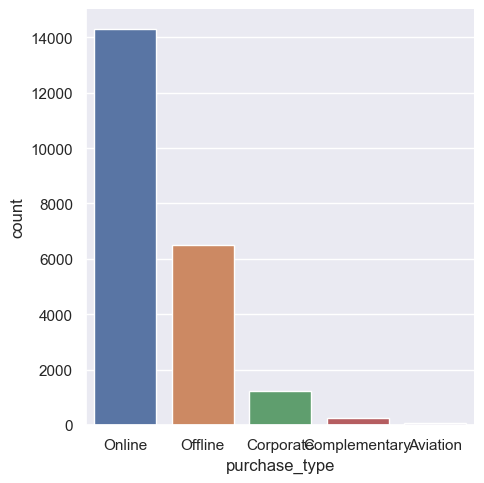

In [50]:
sns.catplot(x = 'purchase_type', kind = 'count', data = df)
df['purchase_type'].value_counts()

In [51]:
df['purchase_type'].value_counts()['Online']/df_cleaned.shape[0] 

0.5339255057102337

In [52]:
mode = df['purchase_type'].mode()[0]
mode

'Online'

In [53]:
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning) # add this so i wont get worning for make changes on copy of df
df['purchase_type'] = df['purchase_type'].fillna(mode)

In [54]:
df[df['purchase_type'].isnull()]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled


In [55]:
######### Handle price ###########

In [56]:
df[df['price'].isnull()]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled
1,INN07691,0,3,Room_Type 1,half board,2,0,0,0,0,365.0,Online,0,0,0,NaN,11/03/2018,1
23,INN22993,1,4,Room_Type 1,half board,2,0,0,0,0,178.0,Online,0,0,0,NaN,12/30/2017,0
51,INN18209,1,2,Room_Type 1,half board,2,0,1,0,0,98.0,Online,0,0,0,NaN,10/21/2018,1
58,INN13691,1,2,Room_Type 1,half board,2,0,0,0,0,321.0,Online,0,0,0,NaN,9/30/2018,1
59,INN23296,0,2,Room_Type 1,half board,2,0,0,0,0,260.0,Online,0,0,0,NaN,8/30/2018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27153,INN02664,2,4,Room_Type 1,half board,2,0,0,0,0,192.0,Online,0,0,0,NaN,4/27/2018,1
27155,INN10471,1,2,Room_Type 4,half board,2,0,0,0,0,160.0,Online,0,0,0,NaN,8/19/2018,1
27199,INN14894,2,1,Room_Type 4,half board,2,0,0,0,0,48.0,Online,0,0,0,NaN,10/31/2017,0
27202,INN35464,2,2,Room_Type 1,half board,2,0,0,0,0,113.0,Online,0,0,0,NaN,03/12/2018,0


In [57]:
df['price'].median()

119.45

In [58]:
# הגישה שלנו פה היא לעבור על כל שורה שיש בה חוסר של מחיר
# לקחת את כל השורות שדומות לה במרכיבים - מס אנשים / מס לילות / סוג חדר
# ואז למצע 
# כך לדעתנו אנחנו נתן מחיר מדוייק יותר ולא סתם ממוצע או חציון

In [59]:

# טיפול בערכים חסרים עבור 'price'
df['total_people'] = df['n_adults'] + df['n_less_12'] + df['n_more_12']

# מחשבים ממוצע לפי קבוצות של מאפיינים דומים
grouped_full = df.groupby(['weekend_nights', 'week_nights', 'total_people', 'room_type', 'board_type'])['price'].mean()
grouped_partial1 = df.groupby(['weekend_nights', 'week_nights', 'room_type', 'board_type'])['price'].mean()
grouped_partial2 = df.groupby(['weekend_nights', 'room_type', 'board_type'])['price'].mean()

# פונקציה למילוי הערך החסר במחיר
def fill_price(row):
    if pd.isnull(row['price']):
        # Try to find the exact combination first
        try:
            return grouped_full.loc[(row['weekend_nights'], row['week_nights'], row['total_people'], row['room_type'], row['board_type'])]
        except KeyError:
            pass
        
        # Try with less strict criteria
        try:
            return grouped_partial1.loc[(row['weekend_nights'], row['week_nights'], row['room_type'], row['board_type'])]
        except KeyError:
            pass

        # Try with even less strict criteria
        try:
            return grouped_partial2.loc[(row['weekend_nights'], row['room_type'], row['board_type'])]
        except KeyError:
            pass
        
        # If nothing is found, return NaN (or any other strategy you prefer)
        return None
    else:
        return row['price']

df['price'] = df.apply(fill_price, axis=1)

# בודקים אם נותרו ערכים חסרים
missing_prices = df[df['price'].isnull()]
print("Rows with missing prices after filling:", len(missing_prices))

# אם נותרו ערכים חסרים, נטפל בהם ידנית או נסיר את השורות האלו
# לדוגמה, נניח ונמלא ידנית או נסיר שורות מסוימות
if len(missing_prices) > 0:
    # הצגת הערכים החסרים לצורך טיפול ידני
    display(missing_prices)
    # הסרת הערכים החסרים
    df = df.dropna(subset=['price'])

# הסרת עמודת העזר 'total_people'
df = df.drop(columns=['total_people'])


Rows with missing prices after filling: 20


,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled,total_people
970,INN36072,0,2,Room_Type 1,half board,2,1,1,0,2,10.0,Online,0,0,0,NaN,09/03/2017,0,4
999,INN15423,0,2,Room_Type 6,half board,1,0,0,0,0,16.0,Online,0,0,0,NaN,9/27/2018,0,1
2879,INN27131,6,12,Room_Type 1,half board,1,0,0,0,1,2.0,Online,0,0,0,NaN,11/18/2018,1,1
5675,INN29900,3,9,Room_Type 1,half board,2,0,0,0,2,0.0,Online,0,0,0,NaN,8/19/2017,0,2
6255,INN30317,0,5,Room_Type 4,half board,1,0,0,0,0,63.0,Online,0,0,0,NaN,5/31/2018,0,1
9907,INN12760,5,15,Room_Type 1,half board,2,0,0,0,0,27.0,Online,0,0,0,NaN,1/25/2018,0,2
10317,INN35779,4,10,Room_Type 4,half board,3,0,0,0,0,88.0,Online,0,0,0,NaN,07/02/2018,1,3
10767,INN09944,2,2,Room_Type 6,half board,1,0,0,0,1,38.0,Online,0,0,0,NaN,9/18/2018,1,1
10935,INN22774,1,2,Room_Type 7,half board,2,3,0,0,2,119.0,Online,0,0,0,NaN,7/22/2018,1,5
13499,INN14946,2,1,Room_Type 2,half board,2,0,1,0,1,14.0,Online,0,0,0,NaN,12/26/2017,0,3


In [60]:
df[df['price'].isnull()]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled


In [61]:
df.to_csv('hotels.csv')

In [62]:
df = pd.read_csv("hotels.csv") #loads the data into df 

In [63]:
df.head()

,Unnamed: 0,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled
0,0,INN09588,1,5,Room_Type 1,half board,2,0,0,0,2,34.0,Online,0,0,0,108.400000,11/28/2018,0
1,1,INN07691,0,3,Room_Type 1,half board,2,0,0,0,0,365.0,Online,0,0,0,115.817031,11/03/2018,1
2,2,INN32192,0,2,Room_Type 4,half board,1,0,0,0,1,148.0,Online,0,0,0,137.300000,05/06/2018,0
3,3,INN32218,1,2,Room_Type 1,half board,2,0,0,0,0,502.0,Offline,0,0,0,127.000000,9/26/2018,1
4,4,INN02994,1,3,Room_Type 4,half board,2,0,1,0,2,32.0,Offline,0,0,0,110.000000,10/19/2017,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26774 entries, 0 to 26773
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           26774 non-null  int64  
 1   ID                   26774 non-null  object 
 2   weekend_nights       26774 non-null  int64  
 3   week_nights          26774 non-null  int64  
 4   room_type            26774 non-null  object 
 5   board_type           26774 non-null  object 
 6   n_adults             26774 non-null  int64  
 7   n_less_12            26774 non-null  int64  
 8   n_more_12            26774 non-null  int64  
 9   booked_tour          26774 non-null  int64  
 10  n_requests           26774 non-null  int64  
 11  lead_time            26774 non-null  float64
 12  purchase_type        26774 non-null  object 
 13  n_p_cacellation      26774 non-null  int64  
 14  n_p_not_cacellation  26774 non-null  int64  
 15  repeated             26774 non-null 

In [65]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26774 entries, 0 to 26773
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   26774 non-null  object 
 1   weekend_nights       26774 non-null  int64  
 2   week_nights          26774 non-null  int64  
 3   room_type            26774 non-null  object 
 4   board_type           26774 non-null  object 
 5   n_adults             26774 non-null  int64  
 6   n_less_12            26774 non-null  int64  
 7   n_more_12            26774 non-null  int64  
 8   booked_tour          26774 non-null  int64  
 9   n_requests           26774 non-null  int64  
 10  lead_time            26774 non-null  float64
 11  purchase_type        26774 non-null  object 
 12  n_p_cacellation      26774 non-null  int64  
 13  n_p_not_cacellation  26774 non-null  int64  
 14  repeated             26774 non-null  int64  
 15  price                26774 non-null 

In [67]:
# נמשיך עם עיבוד הנתונים - נסתכל על הפיצ'רים , נמיר ערכים קטגוריאלים וננרמל

In [68]:
# נתחיל עם הפיצ'רים הקטגוריים שלנו
categorical_features = ['room_type', 'board_type', 'purchase_type', 'date']

# נסתכל על הערכים הייחודיים בכל פיצ'ר קטגורי
for feature in categorical_features:
    print(f"Unique values in {feature}:")
    print(df[feature].unique())
    print()


Unique values in room_type:
['Room_Type 1' 'Room_Type 4' 'Room_Type 6' 'Room_Type 5' 'Room_Type 2'
 'Room_Type 7' 'Room_Type 3']

Unique values in board_type:
['half board' 'full board' 'breakfast']

Unique values in purchase_type:
['Online' 'Offline' 'Corporate' 'Complementary' 'Aviation']

Unique values in date:
['11/28/2018' '11/03/2018' '05/06/2018' '9/26/2018' '10/19/2017'
 '12/20/2018' '5/28/2018' '3/27/2018' '10/21/2018' '6/16/2018'
 '07/01/2017' '3/24/2018' '11/24/2018' '4/16/2018' '9/22/2018'
 '12/26/2017' '04/04/2018' '3/13/2018' '09/05/2018' '12/25/2018'
 '12/29/2018' '12/21/2018' '10/14/2018' '12/30/2017' '4/19/2018'
 '6/26/2018' '5/21/2018' '08/12/2018' '8/27/2018' '11/25/2018'
 '06/09/2018' '08/08/2017' '07/07/2018' '6/18/2018' '4/26/2018'
 '9/19/2018' '4/29/2018' '6/14/2018' '4/27/2018' '3/31/2018' '6/27/2018'
 '10/30/2017' '7/13/2018' '03/11/2018' '05/04/2018' '7/17/2017'
 '12/08/2018' '5/13/2018' '05/05/2018' '7/18/2018' '9/20/2018' '4/15/2018'
 '5/25/2018' '3/22/2018'

In [69]:
# לתאריך יש המון ערכים - לדעתנו נכון להמיר אותם לחודש

In [70]:
df['month'] = df['date'].apply(lambda x: int(x.split('/')[0]) if '/' in x else None)

invalid_dates = df[df['month'].isnull()]
print("Rows with invalid dates:", len(invalid_dates))

if len(invalid_dates) > 0:
    display(invalid_dates)
    

Rows with invalid dates: 27


,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled,month
289,INN10594,1,3,Room_Type 4,half board,2,0,0,1,1,57.0,Online,0,0,0,119.400000,2018-2-29,0,NaN
383,INN30633,1,2,Room_Type 4,breakfast,3,0,0,0,2,9.0,Online,0,0,0,213.000000,2018-2-29,0,NaN
1027,INN27560,1,0,Room_Type 1,half board,1,0,0,0,1,0.0,Online,0,10,1,110.487622,2018-2-29,0,NaN
2819,INN30840,1,2,Room_Type 1,half board,1,0,0,0,0,141.0,Offline,0,0,0,96.000000,2018-2-29,0,NaN
3337,INN19014,1,1,Room_Type 1,half board,1,0,0,1,0,9.0,Corporate,0,0,0,88.000000,2018-2-29,0,NaN
4671,INN15364,1,2,Room_Type 1,half board,1,0,0,0,1,74.0,Online,0,0,0,98.900000,2018-2-29,1,NaN
6416,INN10748,1,3,Room_Type 1,half board,2,0,0,0,0,106.0,Online,0,0,0,76.940000,2018-2-29,1,NaN
6992,INN35482,1,1,Room_Type 1,half board,1,0,0,0,0,9.0,Corporate,0,0,0,86.000000,2018-2-29,0,NaN
7900,INN08001,1,3,Room_Type 6,half board,2,1,1,0,1,4.0,Online,0,0,0,203.000000,2018-2-29,0,NaN
8933,INN21675,1,1,Room_Type 1,half board,1,0,0,0,0,141.0,Offline,0,0,0,95.000000,2018-2-29,0,NaN


In [71]:
df.loc[df['month'].isnull(), 'month'] = 2

df['month'] = df['month'].astype(int)

df = df.drop(columns=['date'])

df.head()

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,is_canceled,month
0,INN09588,1,5,Room_Type 1,half board,2,0,0,0,2,34.0,Online,0,0,0,108.400000,0,11
1,INN07691,0,3,Room_Type 1,half board,2,0,0,0,0,365.0,Online,0,0,0,115.817031,1,11
2,INN32192,0,2,Room_Type 4,half board,1,0,0,0,1,148.0,Online,0,0,0,137.300000,0,5
3,INN32218,1,2,Room_Type 1,half board,2,0,0,0,0,502.0,Offline,0,0,0,127.000000,1,9
4,INN02994,1,3,Room_Type 4,half board,2,0,1,0,2,32.0,Offline,0,0,0,110.000000,0,10


In [72]:
df['month'].unique()

array([11,  5,  9, 10, 12,  3,  6,  7,  4,  8,  1,  2])

In [73]:
# נמיר את שאר הפיצ'רים הקטגוריאלים:

In [74]:
# room_type
room_type_mapping = {
    'Room_Type 1': 1,
    'Room_Type 2': 2,
    'Room_Type 3': 3,
    'Room_Type 4': 4,
    'Room_Type 5': 5,
    'Room_Type 6': 6,
    'Room_Type 7': 7
}
df['room_type'] = df['room_type'].map(room_type_mapping)

# board_type
board_type_mapping = {
    'not selected': 0,
    'breakfast': 1,
    'half board': 2,
    'full board': 3
}
df['board_type'] = df['board_type'].map(board_type_mapping)

# purchase_type
purchase_type_mapping = {
    'Online': 1,
    'Offline': 2,
    'Corporate': 3,
    'Complementary': 4,
    'Aviation': 5
}
df['purchase_type'] = df['purchase_type'].map(purchase_type_mapping)

df.head()

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,is_canceled,month
0,INN09588,1,5,1,2,2,0,0,0,2,34.0,1,0,0,0,108.400000,0,11
1,INN07691,0,3,1,2,2,0,0,0,0,365.0,1,0,0,0,115.817031,1,11
2,INN32192,0,2,4,2,1,0,0,0,1,148.0,1,0,0,0,137.300000,0,5
3,INN32218,1,2,1,2,2,0,0,0,0,502.0,2,0,0,0,127.000000,1,9
4,INN02994,1,3,4,2,2,0,1,0,2,32.0,2,0,0,0,110.000000,0,10


In [75]:
df['booked_tour'].unique()

array([0, 1], dtype=int64)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26774 entries, 0 to 26773
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   26774 non-null  object 
 1   weekend_nights       26774 non-null  int64  
 2   week_nights          26774 non-null  int64  
 3   room_type            26774 non-null  int64  
 4   board_type           26774 non-null  int64  
 5   n_adults             26774 non-null  int64  
 6   n_less_12            26774 non-null  int64  
 7   n_more_12            26774 non-null  int64  
 8   booked_tour          26774 non-null  int64  
 9   n_requests           26774 non-null  int64  
 10  lead_time            26774 non-null  float64
 11  purchase_type        26774 non-null  int64  
 12  n_p_cacellation      26774 non-null  int64  
 13  n_p_not_cacellation  26774 non-null  int64  
 14  repeated             26774 non-null  int64  
 15  price                26774 non-null 

In [77]:
# נסתכל על הערכים הרציפים ונשקול דיסריטיזציה

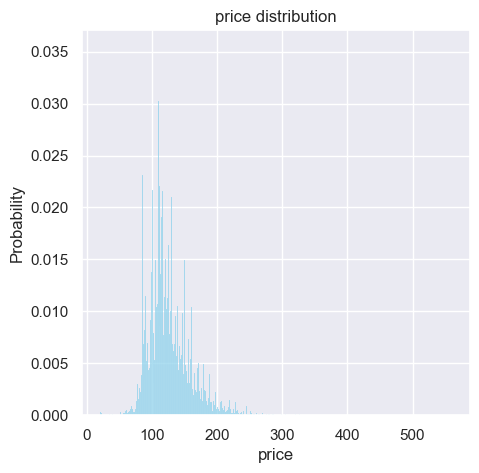

In [78]:
sns.histplot(data=df, x='price', color='skyblue', stat="probability", discrete=True)
plt.title('price distribution')
plt.xlabel('price')
plt.ylabel('Probability')
plt.show()

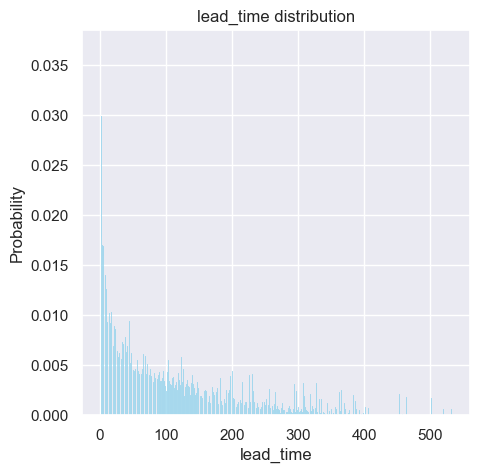

In [79]:
sns.histplot(data=df, x='lead_time', color='skyblue', stat="probability", discrete=True)
plt.title('lead_time distribution')
plt.xlabel('lead_time')
plt.ylabel('Probability')
plt.show()

In [80]:
df['lead_time'].value_counts()

lead_time
0.0      982
2.0      801
3.0      476
4.0      456
5.0      452
        ... 
374.0      1
360.0      1
382.0      1
418.0      1
410.0      1
Name: count, Length: 350, dtype: int64

In [81]:
# קל לראות שההתפלגות של הזמן הזמנה מראש ממש נוטה למספרים הנמוכים

In [82]:
# lead_time Discretization - Equal-depth partitioning
lead_time_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile', subsample=None)
df['lead_time'] = lead_time_discretizer.fit_transform(df[['lead_time']])

# price Discretization - Equal-width partitioning
price_discretizer = KBinsDiscretizer(n_bins=int(df['price'].max() // 25), encode='ordinal', strategy='uniform', subsample=None)
df['price'] = price_discretizer.fit_transform(df[['price']])

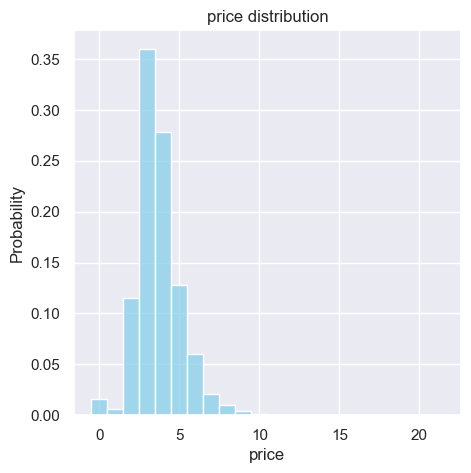

In [83]:
sns.histplot(data=df, x='price', color='skyblue', stat="probability", discrete=True)
plt.title('price distribution')
plt.xlabel('price')
plt.ylabel('Probability')
plt.show()

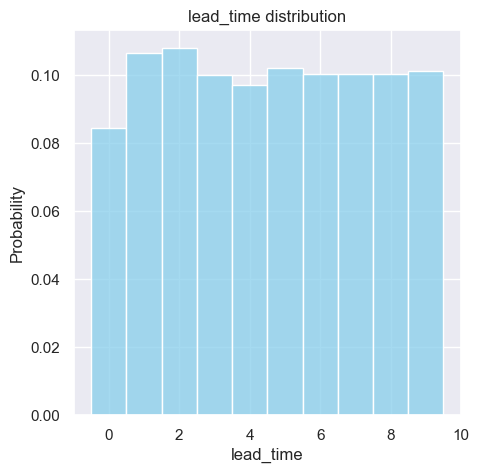

In [84]:
sns.histplot(data=df, x='lead_time', color='skyblue', stat="probability", discrete=True)
plt.title('lead_time distribution')
plt.xlabel('lead_time')
plt.ylabel('Probability')
plt.show()

In [85]:
# נרמול הנתונים:

In [86]:
# רשימת הפיצ'רים לנרמול
features_to_scale = ['weekend_nights', 'week_nights', 'n_adults', 'n_less_12', 'n_more_12', 'n_requests', 'n_p_cacellation', 'n_p_not_cacellation', 'lead_time', 'price']

scaler = MinMaxScaler()

df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

df.head()

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,is_canceled,month
0,INN09588,0.142857,0.294118,1,2,0.50,0.0,0.000000,0,0.4,0.333333,1,0.0,0.0,0,0.142857,0,11
1,INN07691,0.000000,0.176471,1,2,0.50,0.0,0.000000,0,0.0,1.000000,1,0.0,0.0,0,0.142857,1,11
2,INN32192,0.000000,0.117647,4,2,0.25,0.0,0.000000,0,0.2,0.777778,1,0.0,0.0,0,0.190476,0,5
3,INN32218,0.142857,0.117647,1,2,0.50,0.0,0.000000,0,0.0,1.000000,2,0.0,0.0,0,0.190476,1,9
4,INN02994,0.142857,0.176471,4,2,0.50,0.0,0.333333,0,0.4,0.333333,2,0.0,0.0,0,0.142857,0,10


In [87]:
# רשימת הפיצ'רים הקטגוריאליים
categorical_features = ['month', 'booked_tour', 'room_type', 'board_type', 'purchase_type', 'repeated']

encoder = OneHotEncoder(sparse_output=False)

encoded_features = pd.DataFrame(encoder.fit_transform(df[categorical_features]), columns=encoder.get_feature_names_out(categorical_features))

df = pd.concat([df, encoded_features], axis=1)

df = df.drop(columns=categorical_features)

(df.head())

,ID,weekend_nights,week_nights,n_adults,n_less_12,n_more_12,n_requests,lead_time,n_p_cacellation,n_p_not_cacellation,...,board_type_1,board_type_2,board_type_3,purchase_type_1,purchase_type_2,purchase_type_3,purchase_type_4,purchase_type_5,repeated_0,repeated_1
0,INN09588,0.142857,0.294118,0.50,0.0,0.000000,0.4,0.333333,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,INN07691,0.000000,0.176471,0.50,0.0,0.000000,0.0,1.000000,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,INN32192,0.000000,0.117647,0.25,0.0,0.000000,0.2,0.777778,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,INN32218,0.142857,0.117647,0.50,0.0,0.000000,0.0,1.000000,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,INN02994,0.142857,0.176471,0.50,0.0,0.333333,0.4,0.333333,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26774 entries, 0 to 26773
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   26774 non-null  object 
 1   weekend_nights       26774 non-null  float64
 2   week_nights          26774 non-null  float64
 3   n_adults             26774 non-null  float64
 4   n_less_12            26774 non-null  float64
 5   n_more_12            26774 non-null  float64
 6   n_requests           26774 non-null  float64
 7   lead_time            26774 non-null  float64
 8   n_p_cacellation      26774 non-null  float64
 9   n_p_not_cacellation  26774 non-null  float64
 10  price                26774 non-null  float64
 11  is_canceled          26774 non-null  int64  
 12  month_1              26774 non-null  float64
 13  month_2              26774 non-null  float64
 14  month_3              26774 non-null  float64
 15  month_4              26774 non-null 

In [89]:
df.to_csv('hotels.csv')

In [90]:
df = pd.read_csv("hotels.csv") #loads the data into df 

In [91]:
# lets check if our data is imbalanced: 

In [92]:
cancellation_counts = df['is_canceled'].value_counts()
print(cancellation_counts)

is_canceled
0    18003
1     8771
Name: count, dtype: int64


In [93]:
cancellation_percentages = df['is_canceled'].value_counts(normalize=True) * 100
print(cancellation_percentages)

is_canceled
0    67.240607
1    32.759393
Name: proportion, dtype: float64


In [94]:
cancellation_summary = pd.DataFrame({
    'Count': cancellation_counts,
    'Percentage': cancellation_percentages
})

# הצגת הסיכום
print(cancellation_summary)

             Count  Percentage
is_canceled                   
0            18003   67.240607
1             8771   32.759393


In [95]:
# הדאטה מעט לא מאוזן , ננסה לבצע לו איזון ל 55-45

In [96]:
df = df.drop(columns=['ID'])

In [97]:
X = df.drop('is_canceled', axis=1).values
y = df['is_canceled'].values

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

In [99]:

smote = SMOTE(sampling_strategy=0.7, random_state=42)

X_smote, y_smote = smote.fit_resample(X, y)

under = RandomUnderSampler(sampling_strategy=0.8, random_state=42)

X_resampled, y_resampled = under.fit_resample(X_smote, y_smote)

smote2_data = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['y'])], axis=1)

counts = smote2_data['y'].value_counts()
percentages = smote2_data['y'].value_counts(normalize=True) * 100
print("Counts:\n", counts)
print("\nPercentages:\n", percentages)



C:\Users\User\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\User\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Counts:
 y
0    15752
1    12602
Name: count, dtype: int64

Percentages:
 y
0    55.554772
1    44.445228
Name: proportion, dtype: float64


In [100]:
# בהמשך נבדוק האם הדאטה החדש מעלה את המדדים שלנו או שעדיף להשאר עם המקורי

In [101]:
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

In [102]:
import pickle
from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
scaler = StandardScaler()
X_train_re_scaled = scaler.fit_transform(X_train_re)
X_test_re_scaled = scaler.transform(X_test_re)

In [104]:
X_train_re=X_train_re_scaled
X_test_re=X_test_re_scaled

In [105]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [106]:
# נתחיל עם בניית המודל

In [107]:
# עץ החלטות בינארי:

In [108]:
# יצירת אובייקט Decision Tree Classifier ראשוני
clf_initial = DecisionTreeClassifier(random_state=42)

# אימון המודל הראשוני
clf_initial.fit(X_train_scaled, y_train)

# חיזוי התוויות
y_pred_initial = clf_initial.predict(X_test_scaled)

In [109]:
print(f"Accuracy of initial model : {metrics.accuracy_score(y_test, y_pred_initial)}")
print(f"Recall of initial model : {metrics.recall_score(y_test, y_pred_initial)}")

pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_initial))



Accuracy of initial model : 0.8092321481924111
Recall of initial model : 0.7067329417080885


,0,1
0,3853,628
1,649,1564


In [110]:
y_train_pred_initial = clf_initial.predict(X_train_scaled)
print(f"Training Accuracy of initial model: {metrics.accuracy_score(y_train, y_train_pred_initial)}")
print(f"Training Recall of initial model: {metrics.recall_score(y_train, y_train_pred_initial)}")

pd.DataFrame(metrics.confusion_matrix(y_train, y_train_pred_initial))

Training Accuracy of initial model: 1.0
Training Recall of initial model: 1.0


,0,1
0,13522,0
1,0,6558


In [111]:
# we are on overfiting! 
# lets try change some of the hyperparameter:

In [112]:
clf_tuned = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=8,
                                   min_samples_split=15, min_samples_leaf=5, random_state=42)

clf_tuned.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=5,
                       min_samples_split=15, random_state=42)

In [113]:
y_train_pred_tuned = clf_tuned.predict(X_train_scaled)
print(f"Training Accuracy of tuned model : {metrics.accuracy_score(y_train, y_train_pred_tuned)}")
print(f"Training Recall of tuned model : {metrics.recall_score(y_train, y_train_pred_tuned)}")
(pd.DataFrame(metrics.confusion_matrix(y_train, y_train_pred_tuned)))

Training Accuracy of tuned model : 0.834113545816733
Training Recall of tuned model : 0.590576395242452


,0,1
0,12876,646
1,2685,3873


In [114]:
y_pred_tuned = clf_tuned.predict(X_test_scaled)
print(f"Accuracy of tuned model : {metrics.accuracy_score(y_test, y_pred_tuned)}")
print(f"Recall of tuned model : {metrics.recall_score(y_test, y_pred_tuned)}")
(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_tuned)))

Accuracy of tuned model : 0.8208843740663281
Recall of tuned model : 0.5802078626299142


,0,1
0,4211,270
1,929,1284


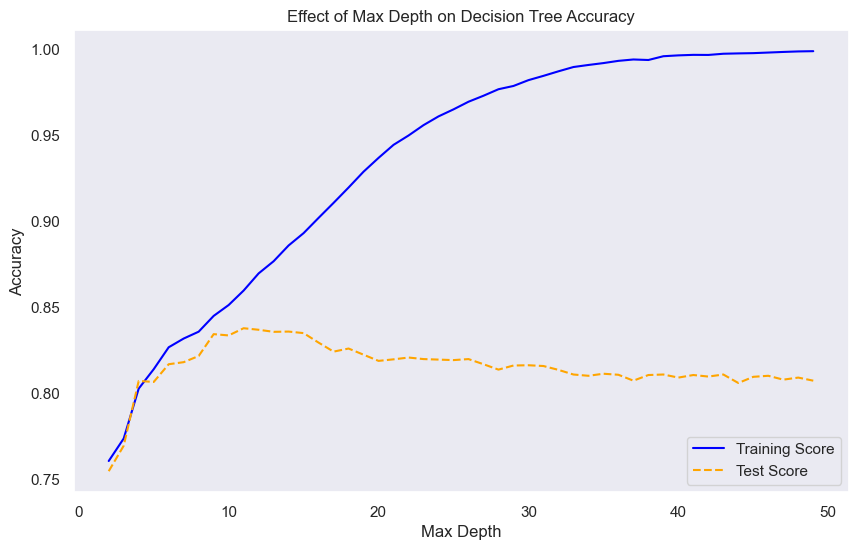

In [115]:
train_scores, test_scores = [], []

for k in range(2, 50):
    clf_tuned = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                                  max_depth=k, random_state=42) 
    clf_tuned.fit(X_train_scaled, y_train)
    train_scores.append(clf_tuned.score(X_train_scaled, y_train))
    test_scores.append(clf_tuned.score(X_test_scaled, y_test))
    
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(range(2, 50), train_scores, linestyle='-', color='blue')
ax.plot(range(2, 50), test_scores, linestyle='--', color='orange')

ax.set_xlabel('Max Depth')
ax.set_ylabel('Accuracy')
ax.set_title('Effect of Max Depth on Decision Tree Accuracy')

ax.legend(['Training Score', 'Test Score'], loc='lower right')
ax.grid()

plt.show()

In [116]:
# מציאת הנקודה שבה דיוק הבדיקה הוא הגבוה ביותר
optimal_index = np.argmax(test_scores)
optimal_max_depth = range(2, 50)[optimal_index]

print(f"The optimal max_depth is: {optimal_max_depth}")
print(f"Training Accuracy at optimal max_depth: {train_scores[optimal_index]}")
print(f"Testing Accuracy at optimal max_depth: {test_scores[optimal_index]}")

The optimal max_depth is: 11
Training Accuracy at optimal max_depth: 0.8598107569721115
Testing Accuracy at optimal max_depth: 0.8379145503435913


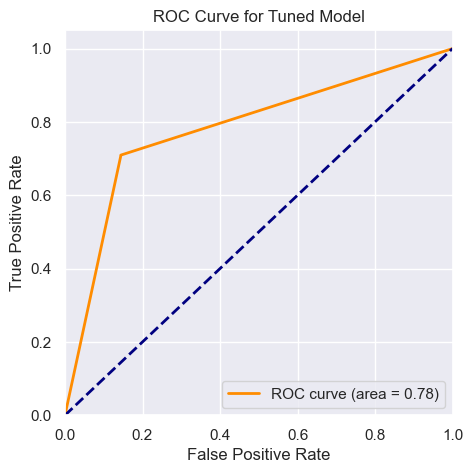

In [117]:
y_pred_proba_tuned = clf_tuned.predict_proba(X_test_scaled)[:,1]
fpr_tuned, tpr_tuned, _ = metrics.roc_curve(y_test, y_pred_proba_tuned)
roc_auc_tuned = metrics.auc(fpr_tuned, tpr_tuned)

plt.figure()
plt.plot(fpr_tuned, tpr_tuned, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_tuned:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned Model')
plt.legend(loc="lower right")
plt.show()

In [118]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 8, 10, 12],
    'min_samples_split': [10, 15, 20],
    'min_samples_leaf': [5, 10, 15]
}

# יצירת אובייקט GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, scoring='roc_auc', cv=10, n_jobs=-1, verbose=2)

# חיפוש ההיפרפרמטרים הטובים ביותר על נתוני האימון
grid_search.fit(X_train_scaled, y_train)

# הצגת התוצאות
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best ROC AUC Score: {grid_search.best_score_}")

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 10, 'min_samples_split': 10}
Best ROC AUC Score: 0.8999467095476135


Accuracy of best model : 0.8398565879892441
Recall of best model : 0.693176683235427


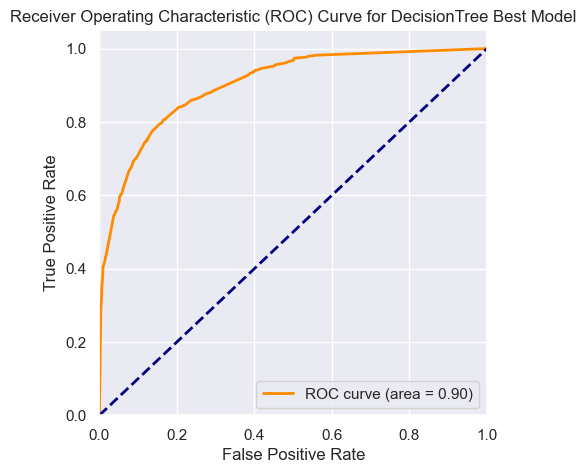

In [119]:
best_clf = grid_search.best_estimator_

y_pred_best = best_clf.predict(X_test_scaled)
print(f"Accuracy of best model : {metrics.accuracy_score(y_test, y_pred_best)}")
print(f"Recall of best model : {metrics.recall_score(y_test, y_pred_best)}")

y_pred_proba_best = best_clf.predict_proba(X_test_scaled)[:,1]
fpr_best, tpr_best, _ = metrics.roc_curve(y_test, y_pred_proba_best)
roc_auc_best = metrics.auc(fpr_best, tpr_best)

plt.figure()
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_best:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for DecisionTree Best Model')
plt.legend(loc="lower right")
plt.show()

In [120]:
# השוואה מול הנתונים אחרי smote

In [121]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 8, 10, 12],
    'min_samples_split': [10, 15, 20],
    'min_samples_leaf': [5, 10, 15]
}

# יצירת אובייקט GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, scoring='roc_auc', cv=10, n_jobs=-1, verbose=2)

# חיפוש ההיפרפרמטרים הטובים ביותר על נתוני האימון
grid_search.fit(X_train_re, y_train_re)

# הצגת התוצאות
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best ROC AUC Score: {grid_search.best_score_}")

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 20}
Best ROC AUC Score: 0.9249934030202598


Accuracy of best model : 0.8126675130483848
Recall of best model : 0.6711538461538461


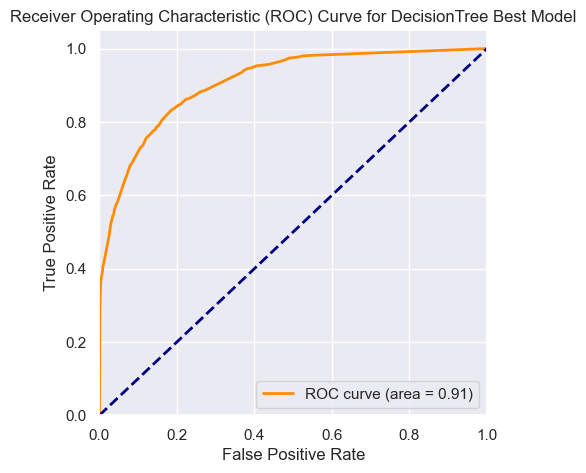

In [122]:
best_clf_re = grid_search.best_estimator_

y_pred_best = best_clf.predict(X_test_re)
print(f"Accuracy of best model : {metrics.accuracy_score(y_test_re, y_pred_best)}")
print(f"Recall of best model : {metrics.recall_score(y_test_re, y_pred_best)}")

y_pred_proba_best = best_clf.predict_proba(X_test_re)[:,1]
fpr_best, tpr_best, _ = metrics.roc_curve(y_test_re, y_pred_proba_best)
roc_auc_best = metrics.auc(fpr_best, tpr_best)

plt.figure()
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_best:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for DecisionTree Best Model')
plt.legend(loc="lower right")
plt.show()

In [123]:
# השוואה בין מודלים

In [124]:
# השוואה בין המודלים לפי קרוס ולידציה

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Mean ROC AUC for the best model: 0.8999467095476135
Mean ROC AUC for the best model with resampled data: 0.9249934030202598


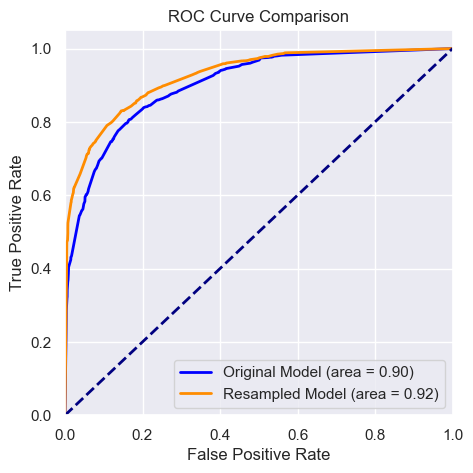

T-statistic: -8.456525938564244
P-value: 1.4169716440659006e-05
The difference between the models is statistically significant.


In [125]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score

# Define a custom scorer for ROC AUC
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# Perform cross-validation with 10 folds for the original model
roc_auc_scores_best = cross_val_score(best_clf, X_train_scaled, y_train, cv=10, scoring=roc_auc_scorer)
print(f"Mean ROC AUC for the best model: {roc_auc_scores_best.mean()}")

# Perform cross-validation with 10 folds for the model trained with resampled data
roc_auc_scores_best_re = cross_val_score(best_clf_re, X_train_re, y_train_re, cv=10, scoring=roc_auc_scorer)
print(f"Mean ROC AUC for the best model with resampled data: {roc_auc_scores_best_re.mean()}")

# Plot the ROC curves
plt.figure()

# Original model ROC Curve
fpr_best, tpr_best, _ = metrics.roc_curve(y_test, best_clf.predict_proba(X_test_scaled)[:, 1])
roc_auc_best = metrics.auc(fpr_best, tpr_best)
plt.plot(fpr_best, tpr_best, color='blue', lw=2, label=f'Original Model (area = {roc_auc_best:0.2f})')

# Resampled model ROC Curve
fpr_best_re, tpr_best_re, _ = metrics.roc_curve(y_test_re, best_clf_re.predict_proba(X_test_re)[:, 1])
roc_auc_best_re = metrics.auc(fpr_best_re, tpr_best_re)
plt.plot(fpr_best_re, tpr_best_re, color='darkorange', lw=2, label=f'Resampled Model (area = {roc_auc_best_re:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

# Perform t-test to compare the ROC AUC scores
from scipy.stats import ttest_rel

t_stat, p_value = ttest_rel(roc_auc_scores_best, roc_auc_scores_best_re)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")


In [126]:
# after ttest we can see there isnt diffrence between working with original data or more balanced data

In [127]:
# Gaussian Naive Bayes:

In [128]:
# יצירת המודל Gaussian Naive Bayes
gnb = GaussianNB()

# אימון המודל
gnb.fit(X_train_scaled, y_train)

# חיזוי התוויות
y_pred = gnb.predict(X_test_scaled)
y_train_pred = gnb.predict(X_train_scaled)

# הצגת תוצאות האימון והבדיקה
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Training Recall: {recall_score(y_train, y_train_pred)}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Testing Recall: {recall_score(y_test, y_pred)}")

print("Confusion Matrix (Train):")
print(pd.DataFrame(confusion_matrix(y_train, y_train_pred)))
print("Confusion Matrix (Test):")
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))

Training Accuracy: 0.42280876494023906
Training Recall: 0.9656907593778591
Testing Accuracy: 0.4323274574245593
Testing Recall: 0.9661093538183462
Confusion Matrix (Train):
      0      1
0  2157  11365
1   225   6333
Confusion Matrix (Test):
     0     1
0  756  3725
1   75  2138


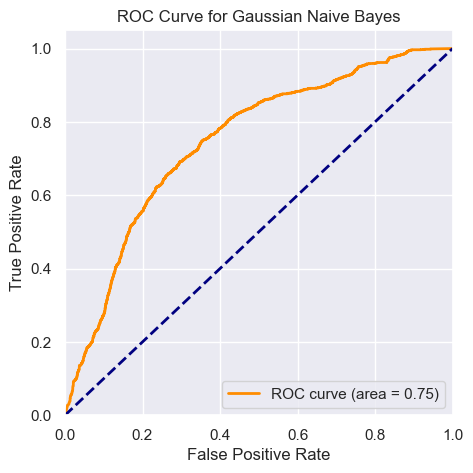

AUC Score: 0.7468122422402446


In [129]:
y_pred_proba = gnb.predict_proba(X_test_scaled)[:, 1]

# חישוב ה-ROC Curve וה-AUC Score
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# הצגת ה-ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gaussian Naive Bayes')
plt.legend(loc="lower right")
plt.show()

# הדפסת AUC Score
print(f"AUC Score: {roc_auc}")

In [130]:
# trying the same model on the smote data

In [131]:
gnb_res = GaussianNB()

# אימון המודל
gnb_res.fit(X_train_re, y_train_re)

# חיזוי התוויות
y_pred_re = gnb_res.predict(X_test_re)
y_train_pred_re = gnb_res.predict(X_train_re)

# הצגת תוצאות האימון והבדיקה
print(f"Training Accuracy (SMOTE): {accuracy_score(y_train_re, y_train_pred_re)}")
print(f"Training Recall (SMOTE): {recall_score(y_train_re, y_train_pred_re)}")
print(f"Testing Accuracy (SMOTE): {accuracy_score(y_test_re, y_pred_re)}")
print(f"Testing Recall (SMOTE): {recall_score(y_test_re, y_pred_re)}")

print("Confusion Matrix (Train) (SMOTE):")
print(pd.DataFrame(confusion_matrix(y_train_re, y_train_pred_re)))
print("Confusion Matrix (Test) (SMOTE):")
print(pd.DataFrame(confusion_matrix(y_test_re, y_pred_re)))

Training Accuracy (SMOTE): 0.5226898659769574
Training Recall (SMOTE): 0.9698375870069605
Testing Accuracy (SMOTE): 0.5127662575821695
Testing Recall (SMOTE): 0.9663461538461539
Confusion Matrix (Train) (SMOTE):
      0     1
0  1919  9864
1   286  9196
Confusion Matrix (Test) (SMOTE):
     0     1
0  620  3349
1  105  3015


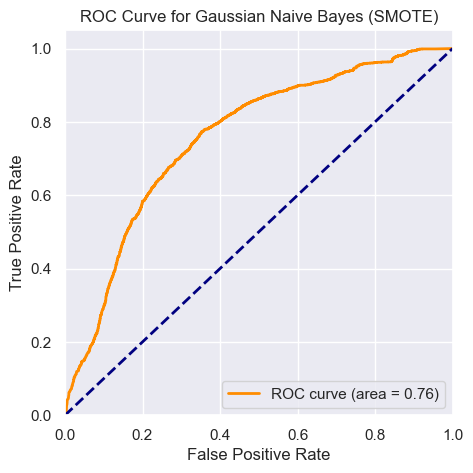

AUC Score (SMOTE): 0.7566547796706526


In [132]:
# חיזוי הסיכויים
y_pred_proba_re = gnb_res.predict_proba(X_test_re)[:, 1]

# חישוב ה-ROC Curve וה-AUC Score
fpr_res, tpr_res, _ = roc_curve(y_test_re, y_pred_proba_re)
roc_auc_res = roc_auc_score(y_test_re, y_pred_proba_re)

# הצגת ה-ROC Curve
plt.figure()
plt.plot(fpr_res, tpr_res, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_res:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gaussian Naive Bayes (SMOTE)')
plt.legend(loc="lower right")
plt.show()

# הדפסת AUC Score
print(f"AUC Score (SMOTE): {roc_auc_res}")

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best Parameters: {'var_smoothing': 1e-05}
Best Accuracy Score: 0.5233478667192097
Accuracy of best model : 0.5130483848215546
Recall of best model : 0.9647435897435898


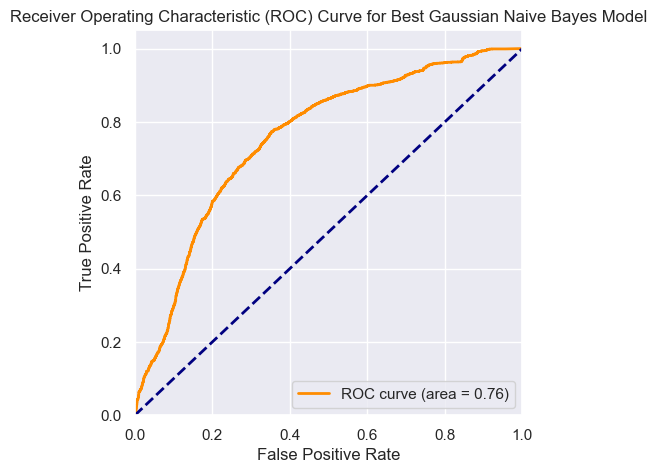

In [133]:
# Define hyperparameters for Gaussian Naive Bayes
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Create GridSearchCV object
grid_search_gnb = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1, verbose=2)

# Find the best hyperparameters on the training data
grid_search_gnb.fit(X_train_re, y_train_re)

# Display the results
print(f"Best Parameters: {grid_search_gnb.best_params_}")
print(f"Best Accuracy Score: {grid_search_gnb.best_score_}")

best_gnb = grid_search_gnb.best_estimator_

# Predict labels with the best model
y_pred_best_gnb = best_gnb.predict(X_test_re)
print(f"Accuracy of best model : {accuracy_score(y_test_re, y_pred_best_gnb)}")
print(f"Recall of best model : {recall_score(y_test_re, y_pred_best_gnb)}")

# Predict probabilities with the best model
y_pred_proba_best_gnb = best_gnb.predict_proba(X_test_re)[:, 1]
fpr_best_gnb, tpr_best_gnb, _ = roc_curve(y_test_re, y_pred_proba_best_gnb)
roc_auc_best_gnb = roc_auc_score(y_test_re, y_pred_proba_best_gnb)

# Plot ROC Curve
plt.figure()
plt.plot(fpr_best_gnb, tpr_best_gnb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_best_gnb:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Best Gaussian Naive Bayes Model')
plt.legend(loc="lower right")
plt.show()

In [134]:
# it looks like we are getting here very good recall precentages but we accualy need the accuracy. this model is worth

In [135]:
# next model - random forest

In [136]:
# Create Random Forest Classifier object
rf_clf = RandomForestClassifier(random_state=42)

# Train Random Forest Classifier
rf_clf.fit(X_train_scaled, y_train)

# Predict labels
y_pred_rf = rf_clf.predict(X_test_scaled)
y_train_pred_rf = rf_clf.predict(X_train_scaled)

# Display training results
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred_rf)}")
print(f"Training Recall: {recall_score(y_train, y_train_pred_rf)}")

# Display testing results
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Testing Recall: {recall_score(y_test, y_pred_rf)}")

print("Confusion Matrix (Train):")
print(pd.DataFrame(confusion_matrix(y_train, y_train_pred_rf)))

print("Confusion Matrix (Test):")
print(pd.DataFrame(confusion_matrix(y_test, y_pred_rf)))

Training Accuracy: 1.0
Training Recall: 1.0
Testing Accuracy: 0.8550941141320586
Testing Recall: 0.7166741979213737
Confusion Matrix (Train):
       0     1
0  13522     0
1      0  6558
Confusion Matrix (Test):
      0     1
0  4138   343
1   627  1586


Fitting 10 folds for each of 81 candidates, totalling 810 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy Score: 0.8661852589641434
Accuracy of best model : 0.8624141021810576
Recall of best model : 0.7230004518752824


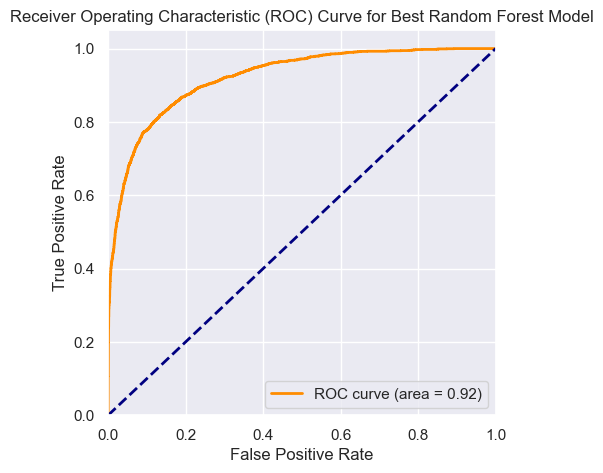

In [137]:
# Define hyperparameters for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1, verbose=2)

# Find the best hyperparameters on the training data
grid_search_rf.fit(X_train_scaled, y_train)

# Display the results
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Best Accuracy Score: {grid_search_rf.best_score_}")

best_rf = grid_search_rf.best_estimator_

# Predict labels with the best model
y_pred_best_rf = best_rf.predict(X_test_scaled)
print(f"Accuracy of best model : {accuracy_score(y_test, y_pred_best_rf)}")
print(f"Recall of best model : {recall_score(y_test, y_pred_best_rf)}")

# Predict probabilities with the best model
y_pred_proba_best_rf = best_rf.predict_proba(X_test_scaled)[:, 1]
fpr_best_rf, tpr_best_rf, _ = roc_curve(y_test, y_pred_proba_best_rf)
roc_auc_best_rf = roc_auc_score(y_test, y_pred_proba_best_rf)

# Plot ROC Curve
plt.figure()
plt.plot(fpr_best_rf, tpr_best_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_best_rf:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Best Random Forest Model')
plt.legend(loc="lower right")
plt.show()

In [138]:
# trying to run random forest with smote data:

Fitting 10 folds for each of 81 candidates, totalling 810 fits
Best Parameters for RF_SMOTE: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy Score for RF_SMOTE: 0.8785811903665678
Accuracy of best RF_SMOTE model: 0.8785442234447736
Recall of best RF_SMOTE model: 0.8285256410256411


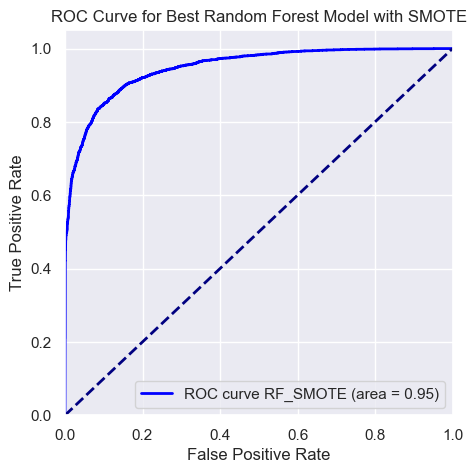

In [139]:
# Define hyperparameters for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object for Random Forest
grid_search_rf_smote = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1, verbose=2)

# Fit Random Forest with SMOTE on the resampled training data
grid_search_rf_smote.fit(X_train_re, y_train_re)

# Display the results for Random Forest with SMOTE
print(f"Best Parameters for RF_SMOTE: {grid_search_rf_smote.best_params_}")
print(f"Best Accuracy Score for RF_SMOTE: {grid_search_rf_smote.best_score_}")

best_rf_smote = grid_search_rf_smote.best_estimator_

# Predict labels with the best model
y_pred_rf_smote = best_rf_smote.predict(X_test_re)
print(f"Accuracy of best RF_SMOTE model: {accuracy_score(y_test_re, y_pred_rf_smote)}")
print(f"Recall of best RF_SMOTE model: {recall_score(y_test_re, y_pred_rf_smote)}")

# Predict probabilities with the best model
y_pred_proba_rf_smote = best_rf_smote.predict_proba(X_test_re)[:, 1]
fpr_rf_smote, tpr_rf_smote, _ = roc_curve(y_test_re, y_pred_proba_rf_smote)
roc_auc_rf_smote = roc_auc_score(y_test_re, y_pred_proba_rf_smote)

plt.figure()
plt.plot(fpr_rf_smote, tpr_rf_smote, color='blue', lw=2, label=f'ROC curve RF_SMOTE (area = {roc_auc_rf_smote:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Random Forest Model with SMOTE')
plt.legend(loc="lower right")
plt.show()


In [140]:
# compate RF with and without smote: 

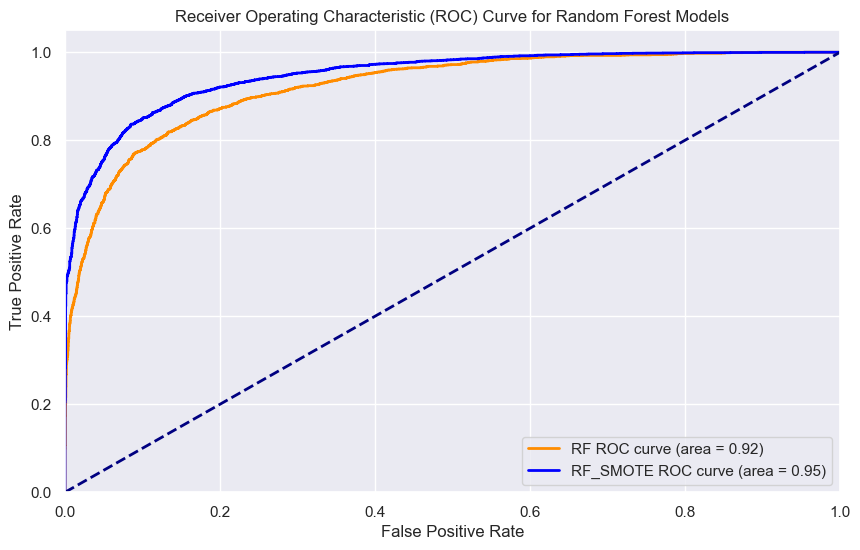

In [141]:
# Plot ROC Curves for both models
plt.figure(figsize=(10, 6))
plt.plot(fpr_best_rf, tpr_best_rf, color='darkorange', lw=2, label=f'RF ROC curve (area = {roc_auc_best_rf:0.2f})')
plt.plot(fpr_rf_smote, tpr_rf_smote, color='blue', lw=2, label=f'RF_SMOTE ROC curve (area = {roc_auc_rf_smote:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Models')
plt.legend(loc="lower right")
plt.show()

In [142]:
from scipy.stats import ttest_ind

# Cross-validation accuracy scores
cv_scores_rf = cross_val_score(best_rf, X_train_scaled, y_train, cv=10)
cv_scores_rf_smote = cross_val_score(best_rf_smote, X_train_re, y_train_re, cv=10)

print(f"CV Accuracy Scores for RF: {cv_scores_rf.mean()} ± {cv_scores_rf.std()}")
print(f"CV Accuracy Scores for RF_SMOTE: {cv_scores_rf_smote.mean()} ± {cv_scores_rf_smote.std()}")

# T-test between RF and RF_SMOTE
t_stat, p_value = ttest_ind(cv_scores_rf, cv_scores_rf_smote)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("The difference between RF and RF_SMOTE is statistically significant.")
else:
    print("The difference between RF and RF_SMOTE is not statistically significant.")

CV Accuracy Scores for RF: 0.8661852589641434 ± 0.00840158777824763
CV Accuracy Scores for RF_SMOTE: 0.8785811903665678 ± 0.009586292090997744
T-statistic: -2.9173971521956985, P-value: 0.009193173859568015
The difference between RF and RF_SMOTE is statistically significant.


In [143]:
# we can conclude that rf-smote is better model for our mission.

In [144]:
# SVM

In [145]:
from sklearn.svm import SVC

In [146]:
# Define hyperparameters for SVM
#param_grid = {
#    'C': [0.1, 1, 10, 100],
#    'gamma': [1, 0.1, 0.01, 0.001],
#    'kernel': ['rbf']
#}
#
# Create GridSearchCV object
#grid_search_svm = GridSearchCV(estimator=SVC(probability=True, random_state=42), param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1, verbose=2)

# Find the best hyperparameters on the training data
#grid_search_svm.fit(X_train, y_train)

# Display the results
#print(f"Best Parameters: {grid_search_svm.best_params_}")
#print(f"Best Accuracy Score: {grid_search_svm.best_score_}")


In [147]:
#best_svm = grid_search_svm.best_estimator_

# Evaluate the best model on the test data
#y_pred_best_svm = best_svm.predict(X_test)
#print(f"Accuracy of best model : {accuracy_score(y_test, y_pred_best_svm)}")
#print(f"Recall of best model : {recall_score(y_test, y_pred_best_svm)}")

# Predict probabilities and plot ROC Curve
#y_pred_proba_best_svm = best_svm.predict_proba(X_test)[:, 1]
#fpr_best_svm, tpr_best_svm, _ = roc_curve(y_test, y_pred_proba_best_svm)
#roc_auc_best_svm = roc_auc_score(y_test, y_pred_proba_best_svm)

#plt.figure()
#plt.plot(fpr_best_svm, tpr_best_svm, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_best_svm:0.2f})')
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic (ROC) Curve for Best SVM Model')
#plt.legend(loc="lower right")
#plt.show()

In [148]:
# Define a smaller hyperparameter grid for SVM
#param_grid = {
#    'C': [0.1, 1, 10],
#    'gamma': [0.1, 0.01, 0.001],
#    'kernel': ['rbf', 'linear']
#}

# Create GridSearchCV object
#grid_search_svm = GridSearchCV(estimator=SVC(probability=True, random_state=42), param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

# Find the best hyperparameters on the training data
#grid_search_svm.fit(X_train_scaled, y_train)

# Display the results
#print(f"Best Parameters: {grid_search_svm.best_params_}")
#print(f"Best Accuracy Score: {grid_search_svm.best_score_}")

#best_svm = grid_search_svm.best_estimator_

# Evaluate the best model on the test data
#y_pred_best_svm = best_svm.predict(X_test_scaled)
#print(f"Accuracy of best model : {accuracy_score(y_test, y_pred_best_svm)}")
#print(f"Recall of best model : {recall_score(y_test, y_pred_best_svm)}")

# Predict probabilities and plot ROC Curve
#y_pred_proba_best_svm = best_svm.predict_proba(X_test_scaled)[:, 1]
#fpr_best_svm, tpr_best_svm, _ = roc_curve(y_test, y_pred_proba_best_svm)
#roc_auc_best_svm = roc_auc_score(y_test, y_pred_proba_best_svm)

#plt.figure()
#plt.plot(fpr_best_svm, tpr_best_svm, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_best_svm:0.2f})')
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic (ROC) Curve for Best SVM Model')
#plt.legend(loc="lower right")
#plt.show()

In [149]:
# GradientBoosting

Fitting 10 folds for each of 243 candidates, totalling 2430 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy Score: 0.8571215139442232
Accuracy of best model : 0.8527039139527935
Recall of best model : 0.7248079530049706


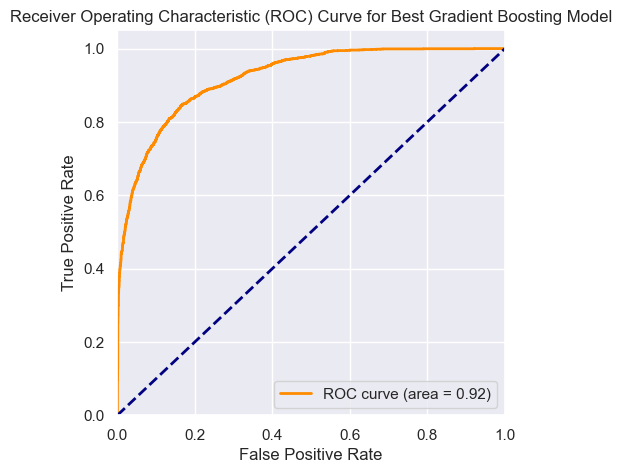

CV Accuracy Scores for GB: 0.8571215139442232 ± 0.0076130092209495855


In [150]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define hyperparameters for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object
grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1, verbose=2)

# Find the best hyperparameters on the training data
grid_search_gb.fit(X_train_scaled, y_train)

# Display the results
print(f"Best Parameters: {grid_search_gb.best_params_}")
print(f"Best Accuracy Score: {grid_search_gb.best_score_}")

best_gb = grid_search_gb.best_estimator_

# Evaluate the best model on the test data
y_pred_best_gb = best_gb.predict(X_test_scaled)
print(f"Accuracy of best model : {accuracy_score(y_test, y_pred_best_gb)}")
print(f"Recall of best model : {recall_score(y_test, y_pred_best_gb)}")

# Predict probabilities and plot ROC Curve
y_pred_proba_best_gb = best_gb.predict_proba(X_test_scaled)[:, 1]
fpr_best_gb, tpr_best_gb, _ = roc_curve(y_test, y_pred_proba_best_gb)
roc_auc_best_gb = roc_auc_score(y_test, y_pred_proba_best_gb)

plt.figure()
plt.plot(fpr_best_gb, tpr_best_gb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_best_gb:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Best Gradient Boosting Model')
plt.legend(loc="lower right")
plt.show()

# Cross-validation accuracy scores for Gradient Boosting
cv_scores_gb = cross_val_score(best_gb, X_train_scaled, y_train, cv=10)
print(f"CV Accuracy Scores for GB: {cv_scores_gb.mean()} ± {cv_scores_gb.std()}")


In [151]:
# GB with smote:

Fitting 10 folds for each of 243 candidates, totalling 2430 fits
Best Parameters for GB_SMOTE: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy Score for GB_SMOTE: 0.8744424703925386
Accuracy of best GB_SMOTE model: 0.8740301876146142
Recall of best GB_SMOTE model: 0.8336538461538462


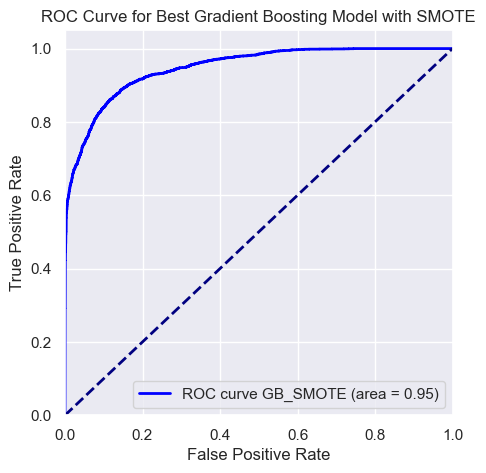

CV Accuracy Scores for GB_SMOTE: 0.8744424703925386 ± 0.007201776739914781


In [152]:
# Create GridSearchCV object for Gradient Boosting with SMOTE
grid_search_gb_smote = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1, verbose=2)

# Find the best hyperparameters on the resampled training data
grid_search_gb_smote.fit(X_train_re, y_train_re)

# Display the results for Gradient Boosting with SMOTE
print(f"Best Parameters for GB_SMOTE: {grid_search_gb_smote.best_params_}")
print(f"Best Accuracy Score for GB_SMOTE: {grid_search_gb_smote.best_score_}")

best_gb_smote = grid_search_gb_smote.best_estimator_

# Evaluate the best model on the test data
y_pred_best_gb_smote = best_gb_smote.predict(X_test_re)
print(f"Accuracy of best GB_SMOTE model: {accuracy_score(y_test_re, y_pred_best_gb_smote)}")
print(f"Recall of best GB_SMOTE model: {recall_score(y_test_re, y_pred_best_gb_smote)}")

# Predict probabilities and plot ROC Curve
y_pred_proba_best_gb_smote = best_gb_smote.predict_proba(X_test_re)[:, 1]
fpr_best_gb_smote, tpr_best_gb_smote, _ = roc_curve(y_test_re, y_pred_proba_best_gb_smote)
roc_auc_best_gb_smote = roc_auc_score(y_test_re, y_pred_proba_best_gb_smote)

plt.figure()
plt.plot(fpr_best_gb_smote, tpr_best_gb_smote, color='blue', lw=2, label=f'ROC curve GB_SMOTE (area = {roc_auc_best_gb_smote:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Gradient Boosting Model with SMOTE')
plt.legend(loc="lower right")
plt.show()

# Cross-validation accuracy scores for Gradient Boosting with SMOTE
cv_scores_gb_smote = cross_val_score(best_gb_smote, X_train_re, y_train_re, cv=10)
print(f"CV Accuracy Scores for GB_SMOTE: {cv_scores_gb_smote.mean()} ± {cv_scores_gb_smote.std()}")

In [153]:
# Perform cross-validation for Gradient Boosting (GB) and GB with SMOTE (GB_SMOTE)
cv_scores_gb = cross_val_score(best_gb, X_train_scaled, y_train, cv=10)
cv_scores_gb_smote = cross_val_score(best_gb_smote, X_train_re, y_train_re, cv=10)

print(f"CV Accuracy Scores for GB: {cv_scores_gb.mean()} ± {cv_scores_gb.std()}")
print(f"CV Accuracy Scores for GB_SMOTE: {cv_scores_gb_smote.mean()} ± {cv_scores_gb_smote.std()}")

# Perform T-test between GB and GB_SMOTE
t_stat_gb, p_value_gb = ttest_ind(cv_scores_gb, cv_scores_gb_smote)
print(f"T-statistic for GB: {t_stat_gb}, P-value: {p_value_gb}")

if p_value_gb < 0.05:
    print("The difference between GB and GB_SMOTE is statistically significant.")
else:
    print("The difference between GB and GB_SMOTE is not statistically significant.")

CV Accuracy Scores for GB: 0.8571215139442232 ± 0.0076130092209495855
CV Accuracy Scores for GB_SMOTE: 0.8744424703925386 ± 0.007201776739914781
T-statistic for GB: -4.9584448710416265, P-value: 0.00010158666745189987
The difference between GB and GB_SMOTE is statistically significant.


CV Accuracy Scores for RF_SMOTE: 0.8785811903665678 ± 0.009586292090997744
CV Accuracy Scores for GB_SMOTE: 0.8744424703925386 ± 0.007201776739914781
T-statistic for RF_SMOTE vs GB_SMOTE: 1.035533998659503, P-value: 0.31413215702299147
The difference between RF_SMOTE and GB_SMOTE is not statistically significant.


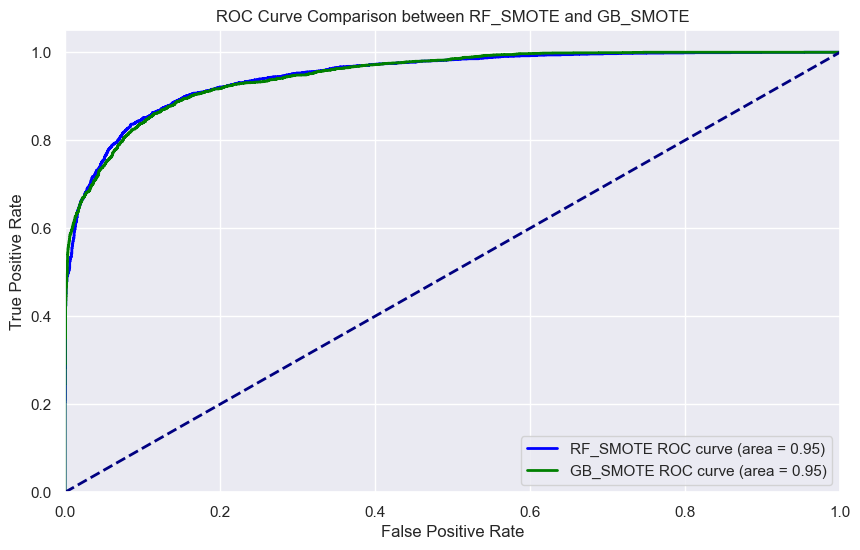

In [154]:
print(f"CV Accuracy Scores for RF_SMOTE: {cv_scores_rf_smote.mean()} ± {cv_scores_rf_smote.std()}")
print(f"CV Accuracy Scores for GB_SMOTE: {cv_scores_gb_smote.mean()} ± {cv_scores_gb_smote.std()}")

t_stat_smote, p_value_smote = ttest_ind(cv_scores_rf_smote, cv_scores_gb_smote)
print(f"T-statistic for RF_SMOTE vs GB_SMOTE: {t_stat_smote}, P-value: {p_value_smote}")

if p_value_smote < 0.05:
    print("The difference between RF_SMOTE and GB_SMOTE is statistically significant.")
else:
    print("The difference between RF_SMOTE and GB_SMOTE is not statistically significant.")

# Predict probabilities with the best models
y_pred_proba_rf_smote = best_rf_smote.predict_proba(X_test_re)[:, 1]
y_pred_proba_gb_smote = best_gb_smote.predict_proba(X_test_re)[:, 1]

# Calculate ROC curves and AUC scores
fpr_rf_smote, tpr_rf_smote, _ = roc_curve(y_test_re, y_pred_proba_rf_smote)
roc_auc_rf_smote = roc_auc_score(y_test_re, y_pred_proba_rf_smote)
fpr_gb_smote, tpr_gb_smote, _ = roc_curve(y_test_re, y_pred_proba_gb_smote)
roc_auc_gb_smote = roc_auc_score(y_test_re, y_pred_proba_gb_smote)

# Plot ROC Curves for both models
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf_smote, tpr_rf_smote, color='blue', lw=2, label=f'RF_SMOTE ROC curve (area = {roc_auc_rf_smote:0.2f})')
plt.plot(fpr_gb_smote, tpr_gb_smote, color='green', lw=2, label=f'GB_SMOTE ROC curve (area = {roc_auc_gb_smote:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison between RF_SMOTE and GB_SMOTE')
plt.legend(loc="lower right")
plt.show()

In [155]:
# in conclution the best models are GB with smote and RF with smote - we choose to we with GB

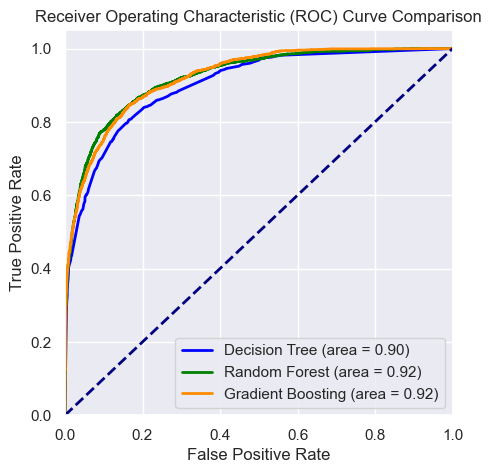

In [156]:
# Plot ROC Curves for all three models
plt.figure()

# ROC Curve for best_clf
plt.plot(fpr_best, tpr_best, color='blue', lw=2, label=f'Decision Tree (area = {roc_auc_best:0.2f})')

# ROC Curve for Random Forest
plt.plot(fpr_best_rf, tpr_best_rf, color='green', lw=2, label=f'Random Forest (area = {roc_auc_best_rf:0.2f})')

# ROC Curve for Gradient Boosting
plt.plot(fpr_best_gb, tpr_best_gb, color='darkorange', lw=2, label=f'Gradient Boosting (area = {roc_auc_best_gb:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc="lower right")
plt.show()


In [157]:
from scipy.stats import ttest_ind

# Perform t-test between Decision Tree and Random Forest
t_stat_best_rf, p_value_best_rf = ttest_ind(y_pred_proba_best, y_pred_proba_best_rf)
print(f"Decision Tree vs Random Forest: T-statistic = {t_stat_best_rf}, P-value = {p_value_best_rf}")

# Perform t-test between Best Model and Gradient Boosting
t_stat_best_gb, p_value_best_gb = ttest_ind(y_pred_proba_best, y_pred_proba_best_gb)
print(f"Decision Tree vs Gradient Boosting: T-statistic = {t_stat_best_gb}, P-value = {p_value_best_gb}")

# Perform t-test between Random Forest and Gradient Boosting
t_stat_rf_gb, p_value_rf_gb = ttest_ind(y_pred_proba_best_rf, y_pred_proba_best_gb)
print(f"Random Forest vs Gradient Boosting: T-statistic = {t_stat_rf_gb}, P-value = {p_value_rf_gb}")

# Interpret the results
if p_value_best_rf < 0.05:
    print("The difference between the Decision Tree and Random Forest is statistically significant.")
else:
    print("The difference between the Decision Tree and Random Forest is not statistically significant.")

if p_value_best_gb < 0.05:
    print("The difference between the Decision Tree and Gradient Boosting is statistically significant.")
else:
    print("The difference between the Decision Tree and Gradient Boosting is not statistically significant.")

if p_value_rf_gb < 0.05:
    print("The difference between the Random Forest and Gradient Boosting is statistically significant.")
else:
    print("The difference between the Random Forest and Gradient Boosting is not statistically significant.")


Decision Tree vs Random Forest: T-statistic = 7.101208919119283, P-value = 1.2972900790842738e-12
Decision Tree vs Gradient Boosting: T-statistic = 7.537843116830881, P-value = 5.07581110778949e-14
Random Forest vs Gradient Boosting: T-statistic = 0.6443607559999835, P-value = 0.5193525674264067
The difference between the Decision Tree and Random Forest is statistically significant.
The difference between the Decision Tree and Gradient Boosting is statistically significant.
The difference between the Random Forest and Gradient Boosting is not statistically significant.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Parameters: {'learning_rate': 0.5, 'n_estimators': 100}
Best Accuracy Score: 0.8068227091633465
Accuracy of best model : 0.8071407230355542
Recall of best model : 0.6461816538635337


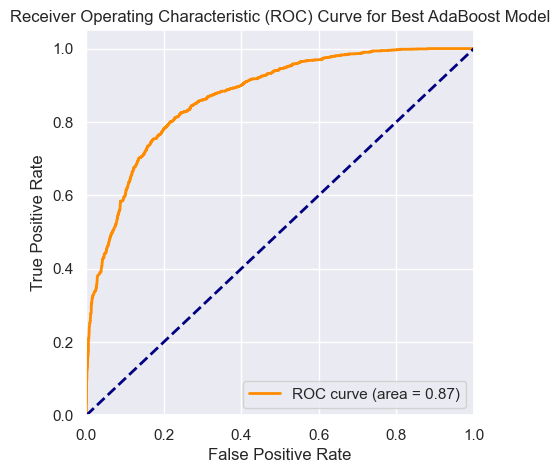

In [158]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for AdaBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

# Create GridSearchCV object
grid_search_ada = GridSearchCV(estimator=AdaBoostClassifier(random_state=42), param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

# Find the best hyperparameters on the training data
grid_search_ada.fit(X_train_scaled, y_train)

# Display the results
print(f"Best Parameters: {grid_search_ada.best_params_}")
print(f"Best Accuracy Score: {grid_search_ada.best_score_}")

best_ada = grid_search_ada.best_estimator_

# Evaluate the best model on the test data
y_pred_best_ada = best_ada.predict(X_test_scaled)
print(f"Accuracy of best model : {accuracy_score(y_test, y_pred_best_ada)}")
print(f"Recall of best model : {recall_score(y_test, y_pred_best_ada)}")

# Predict probabilities and plot ROC Curve
y_pred_proba_best_ada = best_ada.predict_proba(X_test_scaled)[:, 1]
fpr_best_ada, tpr_best_ada, _ = roc_curve(y_test, y_pred_proba_best_ada)
roc_auc_best_ada = roc_auc_score(y_test, y_pred_proba_best_ada)

plt.figure()
plt.plot(fpr_best_ada, tpr_best_ada, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_best_ada:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Best AdaBoost Model')
plt.legend(loc="lower right")
plt.show()


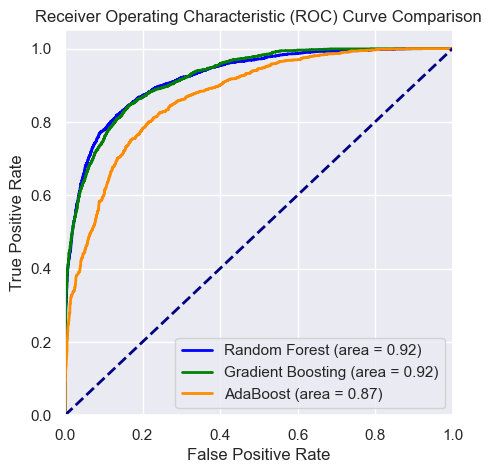

In [159]:
# Assuming you have the predicted probabilities for Random Forest, Gradient Boosting, and AdaBoost

# Random Forest ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_best_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_best_rf)

# Gradient Boosting ROC Curve
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba_best_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_proba_best_gb)

# AdaBoost ROC Curve
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_pred_proba_best_ada)
roc_auc_ada = roc_auc_score(y_test, y_pred_proba_best_ada)

# Plot ROC Curves
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (area = {roc_auc_rf:0.2f})')
plt.plot(fpr_gb, tpr_gb, color='green', lw=2, label=f'Gradient Boosting (area = {roc_auc_gb:0.2f})')
plt.plot(fpr_ada, tpr_ada, color='darkorange', lw=2, label=f'AdaBoost (area = {roc_auc_ada:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc="lower right")
plt.show()


In [160]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
auc_scores_rf = cross_val_score(best_rf, X_train_scaled, y_train, cv=10, scoring='roc_auc')

# Cross-validation for Gradient Boosting
auc_scores_gb = cross_val_score(best_gb, X_train_scaled, y_train, cv=10, scoring='roc_auc')

# Cross-validation for AdaBoost
auc_scores_ada = cross_val_score(best_ada, X_train_scaled, y_train, cv=10, scoring='roc_auc')

# Print cross-validation scores
print(f"Random Forest AUC Scores: {auc_scores_rf}")
print(f"Gradient Boosting AUC Scores: {auc_scores_gb}")
print(f"AdaBoost AUC Scores: {auc_scores_ada}")

# Calculate mean AUC scores
print(f"Mean AUC for Random Forest: {np.mean(auc_scores_rf)}")
print(f"Mean AUC for Gradient Boosting: {np.mean(auc_scores_gb)}")
print(f"Mean AUC for AdaBoost: {np.mean(auc_scores_ada)}")



C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\User\an

Random Forest AUC Scores: [0.91510525 0.91811017 0.92411987 0.93770295 0.9270356  0.92293147
 0.92076779 0.92239816 0.92785812 0.91868359]
Gradient Boosting AUC Scores: [0.91136237 0.91676681 0.92453084 0.93488756 0.92353695 0.92024575
 0.91897618 0.92133831 0.92569612 0.91917293]
AdaBoost AUC Scores: [0.86561105 0.86603364 0.86495503 0.88551288 0.87186948 0.86669083
 0.86751786 0.86241983 0.86891597 0.85605618]
Mean AUC for Random Forest: 0.92347129716872
Mean AUC for Gradient Boosting: 0.921651382103013
Mean AUC for AdaBoost: 0.8675582759450495


In [161]:
from scipy.stats import ttest_ind

# Perform t-test
t_stat_rf_ada, p_value_rf_ada = ttest_ind(auc_scores_rf, auc_scores_ada)
t_stat_gb_ada, p_value_gb_ada = ttest_ind(auc_scores_gb, auc_scores_ada)

print(f"Random Forest vs AdaBoost: T-statistic = {t_stat_rf_ada}, P-value = {p_value_rf_ada}")
print(f"Gradient Boosting vs AdaBoost: T-statistic = {t_stat_gb_ada}, P-value = {p_value_gb_ada}")

if p_value_rf_ada < 0.05:
    print("The difference between Random Forest and AdaBoost is statistically significant.")
else:
    print("The difference between Random Forest and AdaBoost is not statistically significant.")

if p_value_gb_ada < 0.05:
    print("The difference between Gradient Boosting and AdaBoost is statistically significant.")
else:
    print("The difference between Gradient Boosting and AdaBoost is not statistically significant.")

    

Random Forest vs AdaBoost: T-statistic = 17.8763502263829, P-value = 6.625326024940259e-13
Gradient Boosting vs AdaBoost: T-statistic = 17.462055042390446, P-value = 9.885831470408585e-13
The difference between Random Forest and AdaBoost is statistically significant.
The difference between Gradient Boosting and AdaBoost is statistically significant.


In [162]:
# טעינת קובץ הבדיקה - הפעלת כל פעולות הפריפרוסס שעשינו ואז השמת המודל עליו

In [163]:
# Load the test data
df_test = pd.read_csv("Desktop/data_minning_project/hotels_test.csv")

# Display the first few rows of the test data
print("Shape: ", df_test.shape) #print size of rows and calls
df_test.head() #top 5 rows

Shape:  (9072, 17)


,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date
0,INN16062,0,2,Room_Type 4,NaN,2,1,0,0,1,132.0,Online,0,0,0,141.59,5/13/2018
1,INN09467,0,2,Room_Type 2,half board,1,0,0,0,0,159.0,Online,0,0,0,90.56,8/30/2018
2,INN07689,1,4,Room_Type 7,NaN,3,0,0,0,2,32.0,NaN,0,0,0,NaN,9/28/2018
3,INN28642,2,1,Room_Type 1,NaN,2,0,0,0,0,38.0,NaN,0,0,0,NaN,09/11/2018
4,INN34082,1,4,Room_Type 1,half board,2,0,0,0,1,88.0,Online,0,0,0,99.05,3/16/2018


In [164]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9072 entries, 0 to 9071
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9072 non-null   object 
 1   weekend_nights       9072 non-null   int64  
 2   week_nights          9072 non-null   int64  
 3   room_type            9072 non-null   object 
 4   board_type           6355 non-null   object 
 5   n_adults             9072 non-null   int64  
 6   n_less_12            9072 non-null   int64  
 7   n_more_12            9072 non-null   int64  
 8   booked_tour          9072 non-null   int64  
 9   n_requests           9072 non-null   int64  
 10  lead_time            8947 non-null   float64
 11  purchase_type        7461 non-null   object 
 12  n_p_cacellation      9072 non-null   int64  
 13  n_p_not_cacellation  9072 non-null   int64  
 14  repeated             9072 non-null   int64  
 15  price                7942 non-null   f

In [165]:
missing_values = ['board_type','lead_time','purchase_type','price']

In [166]:
df_test[df_test['board_type'].isnull()]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date
0,INN16062,0,2,Room_Type 4,NaN,2,1,0,0,1,132.0,Online,0,0,0,141.59,5/13/2018
2,INN07689,1,4,Room_Type 7,NaN,3,0,0,0,2,32.0,NaN,0,0,0,NaN,9/28/2018
3,INN28642,2,1,Room_Type 1,NaN,2,0,0,0,0,38.0,NaN,0,0,0,NaN,09/11/2018
5,INN12402,1,3,Room_Type 1,NaN,1,0,0,0,0,27.0,Online,0,0,0,126.40,9/26/2018
7,INN26221,2,2,Room_Type 1,NaN,2,0,0,0,1,203.0,NaN,0,0,0,NaN,4/22/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9056,INN23776,2,6,Room_Type 1,NaN,2,0,0,0,0,83.0,Online,0,0,0,143.98,09/01/2018
9059,INN34336,0,2,Room_Type 1,NaN,1,0,0,0,0,10.0,Online,0,0,0,98.00,12/16/2018
9061,INN03510,0,1,Room_Type 1,NaN,2,0,0,0,0,8.0,NaN,0,0,0,NaN,6/30/2018
9067,INN09811,0,3,Room_Type 1,NaN,2,0,0,0,1,326.0,NaN,0,0,0,NaN,9/21/2018


In [167]:
mode = df_test['board_type'].mode()[0]
mode

'half board'

In [168]:
df_test['board_type'] = df_test['board_type'].fillna(mode)
df_test[df_test['board_type'].isnull()]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date


In [169]:
df_test[df_test['lead_time'].isnull()]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date
25,INN26495,2,3,Room_Type 4,half board,1,0,0,0,0,NaN,NaN,0,0,0,NaN,09/10/2018
27,INN00394,0,2,Room_Type 1,half board,2,0,0,0,1,NaN,NaN,0,0,0,NaN,03/04/2018
81,INN02014,0,2,Room_Type 1,half board,1,0,0,0,0,NaN,NaN,0,0,0,NaN,6/24/2018
122,INN26424,0,1,Room_Type 5,half board,1,0,0,0,0,NaN,NaN,0,0,0,NaN,06/02/2018
278,INN07876,2,4,Room_Type 1,half board,2,0,0,0,1,NaN,NaN,0,0,0,NaN,11/13/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8861,INN24742,0,3,Room_Type 1,half board,2,0,0,0,1,NaN,NaN,0,0,0,NaN,8/18/2018
8894,INN02674,0,4,Room_Type 1,half board,2,0,0,0,0,NaN,NaN,0,0,0,NaN,3/30/2018
8997,INN31909,0,3,Room_Type 1,half board,2,0,0,0,2,NaN,NaN,0,0,0,NaN,11/22/2018
9015,INN03303,1,0,Room_Type 1,half board,1,0,0,0,0,NaN,NaN,0,1,1,NaN,10/17/2018


In [170]:
df_cleaned = df_test.dropna(subset=['lead_time'])
df_cleaned[df_cleaned['lead_time'].isnull()]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date


In [171]:
df_test = df_cleaned

In [172]:
df_test[df_test['purchase_type'].isnull()]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date
2,INN07689,1,4,Room_Type 7,half board,3,0,0,0,2,32.0,NaN,0,0,0,NaN,9/28/2018
3,INN28642,2,1,Room_Type 1,half board,2,0,0,0,0,38.0,NaN,0,0,0,NaN,09/11/2018
7,INN26221,2,2,Room_Type 1,half board,2,0,0,0,1,203.0,NaN,0,0,0,NaN,4/22/2018
16,INN01827,0,3,Room_Type 4,half board,3,0,0,0,2,190.0,NaN,0,0,0,166.70,07/07/2018
22,INN23594,0,1,Room_Type 4,half board,1,0,0,0,0,0.0,NaN,0,0,0,20.00,10/15/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9014,INN15531,2,1,Room_Type 1,half board,1,0,0,0,2,5.0,NaN,0,0,0,163.33,10/16/2018
9044,INN12799,1,0,Room_Type 1,half board,2,0,1,0,1,110.0,NaN,0,0,0,NaN,8/14/2018
9061,INN03510,0,1,Room_Type 1,half board,2,0,0,0,0,8.0,NaN,0,0,0,NaN,6/30/2018
9067,INN09811,0,3,Room_Type 1,half board,2,0,0,0,1,326.0,NaN,0,0,0,NaN,9/21/2018


In [173]:
mode = df_test['purchase_type'].mode()[0]
mode

'Online'

In [174]:
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning) # add this so i wont get worning for make changes on copy of df
df_test['purchase_type'] = df_test['purchase_type'].fillna(mode)

In [175]:
df_test[df_test['purchase_type'].isnull()]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date


In [176]:
df_test[df_test['price'].isnull()]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date
2,INN07689,1,4,Room_Type 7,half board,3,0,0,0,2,32.0,Online,0,0,0,NaN,9/28/2018
3,INN28642,2,1,Room_Type 1,half board,2,0,0,0,0,38.0,Online,0,0,0,NaN,09/11/2018
7,INN26221,2,2,Room_Type 1,half board,2,0,0,0,1,203.0,Online,0,0,0,NaN,4/22/2018
51,INN03883,2,4,Room_Type 1,half board,2,0,0,0,2,86.0,Online,0,0,0,NaN,11/12/2018
52,INN14011,0,3,Room_Type 1,half board,2,0,0,0,2,29.0,Online,0,0,0,NaN,9/17/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9008,INN17074,0,1,Room_Type 1,half board,2,0,0,0,0,68.0,Online,0,0,0,NaN,10/05/2018
9044,INN12799,1,0,Room_Type 1,half board,2,0,1,0,1,110.0,Online,0,0,0,NaN,8/14/2018
9061,INN03510,0,1,Room_Type 1,half board,2,0,0,0,0,8.0,Online,0,0,0,NaN,6/30/2018
9067,INN09811,0,3,Room_Type 1,half board,2,0,0,0,1,326.0,Online,0,0,0,NaN,9/21/2018


In [177]:
# Handle missing values in 'board_type'
mode = df_test['board_type'].mode()[0]
df_test['board_type'] = df_test['board_type'].fillna(mode)

# Handle missing values in 'lead_time'
df_test = df_test.dropna(subset=['lead_time'])

# Handle missing values in 'purchase_type'
mode = df_test['purchase_type'].mode()[0]
df_test['purchase_type'] = df_test['purchase_type'].fillna(mode)

# Handle missing values in 'price'
df_test['total_people'] = df_test['n_adults'] + df_test['n_less_12'] + df_test['n_more_12']

grouped_full = df_test.groupby(['weekend_nights', 'week_nights', 'total_people', 'room_type', 'board_type'])['price'].mean()
grouped_partial1 = df_test.groupby(['weekend_nights', 'week_nights', 'room_type', 'board_type'])['price'].mean()
grouped_partial2 = df_test.groupby(['weekend_nights', 'room_type', 'board_type'])['price'].mean()

def fill_price(row):
    if pd.isnull(row['price']):
        try:
            return grouped_full.loc[(row['weekend_nights'], row['week_nights'], row['total_people'], row['room_type'], row['board_type'])]
        except KeyError:
            pass
        try:
            return grouped_partial1.loc[(row['weekend_nights'], row['week_nights'], row['room_type'], row['board_type'])]
        except KeyError:
            pass
        try:
            return grouped_partial2.loc[(row['weekend_nights'], row['room_type'], row['board_type'])]
        except KeyError:
            pass
        return None
    else:
        return row['price']

df_test['price'] = df_test.apply(fill_price, axis=1)

# Remove rows with missing prices
df_test = df_test.dropna(subset=['price'])

# Remove the 'total_people' helper column
df_test = df_test.drop(columns=['total_people'])


In [178]:
df_test[df_test['price'].isnull()]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date


In [179]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8930 entries, 0 to 9071
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   8930 non-null   object 
 1   weekend_nights       8930 non-null   int64  
 2   week_nights          8930 non-null   int64  
 3   room_type            8930 non-null   object 
 4   board_type           8930 non-null   object 
 5   n_adults             8930 non-null   int64  
 6   n_less_12            8930 non-null   int64  
 7   n_more_12            8930 non-null   int64  
 8   booked_tour          8930 non-null   int64  
 9   n_requests           8930 non-null   int64  
 10  lead_time            8930 non-null   float64
 11  purchase_type        8930 non-null   object 
 12  n_p_cacellation      8930 non-null   int64  
 13  n_p_not_cacellation  8930 non-null   int64  
 14  repeated             8930 non-null   int64  
 15  price                8930 non-null   float6

In [180]:
df_test[df_test.isnull().sum(axis=1)>0]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date


In [181]:
df_test['month'] = df_test['date'].apply(lambda x: int(x.split('/')[0]) if '/' in x else None)

invalid_dates = df_test[df_test['month'].isnull()]
print("Rows with invalid dates:", len(invalid_dates))

if len(invalid_dates) > 0:
    display(invalid_dates)
    

Rows with invalid dates: 10


,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,month
1020,INN27929,1,5,Room_Type 4,half board,2,0,0,0,1,138.0,Online,0,0,0,122.33,2018-2-29,NaN
2177,INN15439,1,2,Room_Type 1,half board,1,0,0,0,0,2.0,Offline,0,0,0,96.00,2018-2-29,NaN
2351,INN14305,1,3,Room_Type 1,breakfast,2,0,0,0,0,16.0,Online,0,0,0,134.55,2018-2-29,NaN
4973,INN18535,1,2,Room_Type 5,half board,1,0,0,0,0,4.0,Corporate,0,0,0,127.00,2018-2-29,NaN
5679,INN21689,1,2,Room_Type 4,half board,2,0,0,0,1,69.0,Online,0,0,0,115.30,2018-2-29,NaN
6306,INN09935,1,2,Room_Type 1,half board,1,0,0,0,0,54.0,Online,0,0,0,96.30,2018-2-29,NaN
7047,INN30553,1,3,Room_Type 4,half board,2,1,0,0,0,16.0,Offline,0,0,0,106.80,2018-2-29,NaN
7336,INN30617,1,0,Room_Type 5,half board,1,0,0,0,0,26.0,Offline,0,0,0,162.00,2018-2-29,NaN
7347,INN11882,3,7,Room_Type 1,half board,1,0,0,0,1,70.0,Online,0,0,0,86.45,2018-2-29,NaN
7852,INN32042,1,0,Room_Type 1,full board,2,0,0,0,0,60.0,Online,0,0,0,96.50,2018-2-29,NaN


In [182]:
df_test.loc[df_test['month'].isnull(), 'month'] = 2

df_test['month'] = df_test['month'].astype(int)

df_test = df_test.drop(columns=['date'])

df_test.head()

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,month
0,INN16062,0,2,Room_Type 4,half board,2,1,0,0,1,132.0,Online,0,0,0,141.590000,5
1,INN09467,0,2,Room_Type 2,half board,1,0,0,0,0,159.0,Online,0,0,0,90.560000,8
3,INN28642,2,1,Room_Type 1,half board,2,0,0,0,0,38.0,Online,0,0,0,111.724622,9
4,INN34082,1,4,Room_Type 1,half board,2,0,0,0,1,88.0,Online,0,0,0,99.050000,3
5,INN12402,1,3,Room_Type 1,half board,1,0,0,0,0,27.0,Online,0,0,0,126.400000,9


In [183]:
df_test[df_test.isnull().sum(axis=1)>0]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,month


In [184]:
# room_type
room_type_mapping = {
    'Room_Type 1': 1,
    'Room_Type 2': 2,
    'Room_Type 3': 3,
    'Room_Type 4': 4,
    'Room_Type 5': 5,
    'Room_Type 6': 6,
    'Room_Type 7': 7
}
df_test['room_type'] = df_test['room_type'].map(room_type_mapping)

# board_type
board_type_mapping = {
    'not selected': 0,
    'breakfast': 1,
    'half board': 2,
    'full board': 3
}
df_test['board_type'] = df_test['board_type'].map(board_type_mapping)

# purchase_type
purchase_type_mapping = {
    'Online': 1,
    'Offline': 2,
    'Corporate': 3,
    'Complementary': 4,
    'Aviation': 5
}
df_test['purchase_type'] = df_test['purchase_type'].map(purchase_type_mapping)

df_test.head()

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,month
0,INN16062,0,2,4,2,2,1,0,0,1,132.0,1,0,0,0,141.590000,5
1,INN09467,0,2,2,2,1,0,0,0,0,159.0,1,0,0,0,90.560000,8
3,INN28642,2,1,1,2,2,0,0,0,0,38.0,1,0,0,0,111.724622,9
4,INN34082,1,4,1,2,2,0,0,0,1,88.0,1,0,0,0,99.050000,3
5,INN12402,1,3,1,2,1,0,0,0,0,27.0,1,0,0,0,126.400000,9


In [185]:
# lead_time Discretization - Equal-depth partitioning
lead_time_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile', subsample=None)
df_test['lead_time'] = lead_time_discretizer.fit_transform(df_test[['lead_time']])

# price Discretization - Equal-width partitioning
price_discretizer = KBinsDiscretizer(n_bins=int(df_test['price'].max() // 25), encode='ordinal', strategy='uniform', subsample=None)
df_test['price'] = price_discretizer.fit_transform(df_test[['price']])

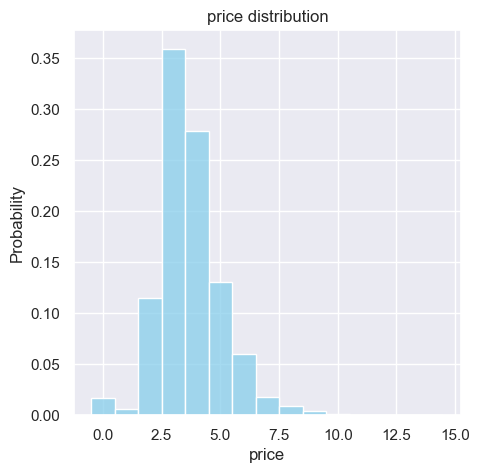

In [186]:
sns.histplot(data=df_test, x='price', color='skyblue', stat="probability", discrete=True)
plt.title('price distribution')
plt.xlabel('price')
plt.ylabel('Probability')
plt.show()

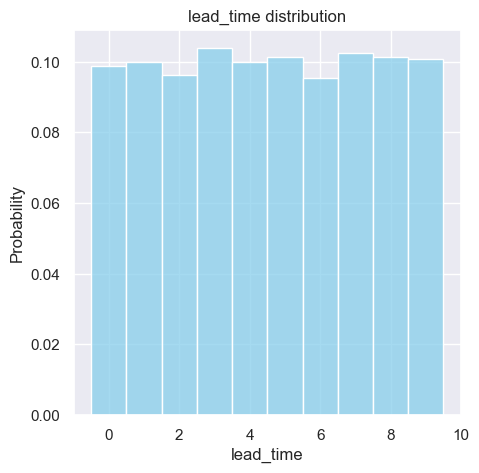

In [187]:
sns.histplot(data=df_test, x='lead_time', color='skyblue', stat="probability", discrete=True)
plt.title('lead_time distribution')
plt.xlabel('lead_time')
plt.ylabel('Probability')
plt.show()

In [188]:
# רשימת הפיצ'רים לנרמול
features_to_scale_test = ['weekend_nights', 'week_nights', 'n_adults', 'n_less_12', 'n_more_12', 'n_requests', 'n_p_cacellation', 'n_p_not_cacellation', 'lead_time', 'price']

scaler = MinMaxScaler()

df_test[features_to_scale_test] = scaler.fit_transform(df_test[features_to_scale_test])

df_test.head()

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,month
0,INN16062,0.000000,0.117647,4,2,0.50,0.166667,0.0,0,0.2,0.777778,1,0.0,0.0,0,0.285714,5
1,INN09467,0.000000,0.117647,2,2,0.25,0.000000,0.0,0,0.0,0.777778,1,0.0,0.0,0,0.142857,8
3,INN28642,0.333333,0.058824,1,2,0.50,0.000000,0.0,0,0.0,0.333333,1,0.0,0.0,0,0.214286,9
4,INN34082,0.166667,0.235294,1,2,0.50,0.000000,0.0,0,0.2,0.555556,1,0.0,0.0,0,0.214286,3
5,INN12402,0.166667,0.176471,1,2,0.25,0.000000,0.0,0,0.0,0.222222,1,0.0,0.0,0,0.285714,9


In [189]:
df_test[df_test.isnull().sum(axis=1)>0]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,month


In [190]:
df_test.to_csv('hotels_test_pre.csv')

In [191]:
df_test = pd.read_csv("./hotels_test_pre.csv")

In [192]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8930 entries, 0 to 8929
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           8930 non-null   int64  
 1   ID                   8930 non-null   object 
 2   weekend_nights       8930 non-null   float64
 3   week_nights          8930 non-null   float64
 4   room_type            8930 non-null   int64  
 5   board_type           8930 non-null   int64  
 6   n_adults             8930 non-null   float64
 7   n_less_12            8930 non-null   float64
 8   n_more_12            8930 non-null   float64
 9   booked_tour          8930 non-null   int64  
 10  n_requests           8930 non-null   float64
 11  lead_time            8930 non-null   float64
 12  purchase_type        8930 non-null   int64  
 13  n_p_cacellation      8930 non-null   float64
 14  n_p_not_cacellation  8930 non-null   float64
 15  repeated             8930 non-null   i

In [193]:
# df_test = df_test.loc[:, ~df_test.columns.str.startswith('Unnamed')]
# df_test = df_test.drop(columns=['ID'])
ids = df_test['ID'] # saving for later use

In [194]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8930 entries, 0 to 8929
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           8930 non-null   int64  
 1   ID                   8930 non-null   object 
 2   weekend_nights       8930 non-null   float64
 3   week_nights          8930 non-null   float64
 4   room_type            8930 non-null   int64  
 5   board_type           8930 non-null   int64  
 6   n_adults             8930 non-null   float64
 7   n_less_12            8930 non-null   float64
 8   n_more_12            8930 non-null   float64
 9   booked_tour          8930 non-null   int64  
 10  n_requests           8930 non-null   float64
 11  lead_time            8930 non-null   float64
 12  purchase_type        8930 non-null   int64  
 13  n_p_cacellation      8930 non-null   float64
 14  n_p_not_cacellation  8930 non-null   float64
 15  repeated             8930 non-null   i

In [195]:
# רשימת הפיצ'רים הקטגוריאליים
categorical_features = ['month', 'booked_tour', 'room_type', 'board_type', 'purchase_type', 'repeated']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit encoder on the train data and transform both train and test data
encoded_features = pd.DataFrame(encoder.fit_transform(df_test[categorical_features]), columns=encoder.get_feature_names_out(categorical_features))

df_test = pd.concat([df_test, encoded_features], axis=1)

df_test = df_test.drop(columns=categorical_features)

(df_test.head())

,Unnamed: 0,ID,weekend_nights,week_nights,n_adults,n_less_12,n_more_12,n_requests,lead_time,n_p_cacellation,...,board_type_1,board_type_2,board_type_3,purchase_type_1,purchase_type_2,purchase_type_3,purchase_type_4,purchase_type_5,repeated_0,repeated_1
0,0,INN16062,0.000000,0.117647,0.50,0.166667,0.0,0.2,0.777778,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,INN09467,0.000000,0.117647,0.25,0.000000,0.0,0.0,0.777778,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,INN28642,0.333333,0.058824,0.50,0.000000,0.0,0.0,0.333333,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,INN34082,0.166667,0.235294,0.50,0.000000,0.0,0.2,0.555556,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,INN12402,0.166667,0.176471,0.25,0.000000,0.0,0.0,0.222222,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [196]:
df_test[df_test.isnull().sum(axis=1)>0]

,Unnamed: 0,ID,weekend_nights,week_nights,n_adults,n_less_12,n_more_12,n_requests,lead_time,n_p_cacellation,...,board_type_1,board_type_2,board_type_3,purchase_type_1,purchase_type_2,purchase_type_3,purchase_type_4,purchase_type_5,repeated_0,repeated_1


In [197]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8930 entries, 0 to 8929
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           8930 non-null   int64  
 1   ID                   8930 non-null   object 
 2   weekend_nights       8930 non-null   float64
 3   week_nights          8930 non-null   float64
 4   n_adults             8930 non-null   float64
 5   n_less_12            8930 non-null   float64
 6   n_more_12            8930 non-null   float64
 7   n_requests           8930 non-null   float64
 8   lead_time            8930 non-null   float64
 9   n_p_cacellation      8930 non-null   float64
 10  n_p_not_cacellation  8930 non-null   float64
 11  price                8930 non-null   float64
 12  month_1              8930 non-null   float64
 13  month_2              8930 non-null   float64
 14  month_3              8930 non-null   float64
 15  month_4              8930 non-null   f

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26774 entries, 0 to 26773
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           26774 non-null  int64  
 1   weekend_nights       26774 non-null  float64
 2   week_nights          26774 non-null  float64
 3   n_adults             26774 non-null  float64
 4   n_less_12            26774 non-null  float64
 5   n_more_12            26774 non-null  float64
 6   n_requests           26774 non-null  float64
 7   lead_time            26774 non-null  float64
 8   n_p_cacellation      26774 non-null  float64
 9   n_p_not_cacellation  26774 non-null  float64
 10  price                26774 non-null  float64
 11  is_canceled          26774 non-null  int64  
 12  month_1              26774 non-null  float64
 13  month_2              26774 non-null  float64
 14  month_3              26774 non-null  float64
 15  month_4              26774 non-null 

In [199]:
df_test.head()

,Unnamed: 0,ID,weekend_nights,week_nights,n_adults,n_less_12,n_more_12,n_requests,lead_time,n_p_cacellation,...,board_type_1,board_type_2,board_type_3,purchase_type_1,purchase_type_2,purchase_type_3,purchase_type_4,purchase_type_5,repeated_0,repeated_1
0,0,INN16062,0.000000,0.117647,0.50,0.166667,0.0,0.2,0.777778,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,INN09467,0.000000,0.117647,0.25,0.000000,0.0,0.0,0.777778,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,INN28642,0.333333,0.058824,0.50,0.000000,0.0,0.0,0.333333,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,INN34082,0.166667,0.235294,0.50,0.000000,0.0,0.2,0.555556,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,INN12402,0.166667,0.176471,0.25,0.000000,0.0,0.0,0.222222,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [200]:
df.head()

,Unnamed: 0,weekend_nights,week_nights,n_adults,n_less_12,n_more_12,n_requests,lead_time,n_p_cacellation,n_p_not_cacellation,...,board_type_1,board_type_2,board_type_3,purchase_type_1,purchase_type_2,purchase_type_3,purchase_type_4,purchase_type_5,repeated_0,repeated_1
0,0,0.142857,0.294118,0.50,0.0,0.000000,0.4,0.333333,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.000000,0.176471,0.50,0.0,0.000000,0.0,1.000000,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,0.000000,0.117647,0.25,0.0,0.000000,0.2,0.777778,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,0.142857,0.117647,0.50,0.0,0.000000,0.0,1.000000,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,0.142857,0.176471,0.50,0.0,0.333333,0.4,0.333333,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [201]:
X_realtest = df_test.drop(columns=['ID']).values

In [202]:
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

#scaler = StandardScaler()

X_realtest_scaled = scaler.transform(X_realtest)
y_pred_realtest = best_gb_smote.predict(X_realtest_scaled)

In [203]:
submission = pd.DataFrame({'ID': ids, 'is_canceled': y_pred_realtest})

In [204]:
submission.to_csv('submission.csv', index=False)

In [205]:
print("Prediction complete. Results saved to 'submission.csv'.")

Prediction complete. Results saved to 'submission.csv'.
